In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dm_control import suite, viewer
from tqdm import tqdm
from ddpg import DDPGagent
from utils import *

In [11]:
random_state = np.random.RandomState(42)

RESUME_TRAINING = True
PATH_MODEL = 'ball_in_cup'
TASK = 'catch'
NUM_EPISODES = 1000
BATCH_SIZE = 128
DURATION = 50
ACTOR_LEARNING_RATE=1e-4
CRITIC_LEARNING_RATE=1e-3
GAMMA=0.99
TAU=1e-2

env = suite.load(PATH_MODEL, TASK, task_kwargs={'random': random_state})
action_spec = env.action_spec()
obs_spec = env.observation_spec()
dim_action = action_spec.shape[0]
dim_obs = sum(tuple(map(lambda x: int(np.prod(x.shape)), obs_spec.values())))

agent = DDPGagent(
    dim_obs,
    dim_action,
    actor_learning_rate=ACTOR_LEARNING_RATE,
    critic_learning_rate=CRITIC_LEARNING_RATE,
    gamma=GAMMA,
    tau=TAU
)
if RESUME_TRAINING: agent.load(PATH_MODEL)
noise = OUNoise(dim_action, action_spec.minimum, action_spec.maximum)

def denorm(a): #  use on model output before passing to env
    act_k = (action_spec.maximum - action_spec.minimum) / 2.
    act_b = (action_spec.maximum + action_spec.minimum) / 2.
    return a * act_k + act_b

def norm(a): # use on env output before passing to model
    act_k_inv = 2. / (action_spec.maximum - action_spec.minimum)
    act_b = (action_spec.maximum + action_spec.minimum) / 2.
    return act_k_inv * (a - act_b)

def parse(obs):
    """
    We lose information about the variables when we combine, for instance,
    velocity and position into 1 long array of observations. Could treating
    them separately lead to a better NN architecture? Velocity, position
    and numerical integration for instance take only ...
    """
    x = np.array([])
    for _, v in obs.items():
        x = np.append(x, v)
    return x

def off_policy():
    return np.random.uniform(action_spec.minimum, action_spec.maximum, size=action_spec.shape)

  0%|          | 0/1000 [00:00<?, ?it/s]c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\users\leeji\pycharmprojects\algorithms\venv\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


episode: 0, reward: 36.0, average_reward: nan
episode: 1, reward: 0.0, average_reward: 36.0


  0%|          | 3/1000 [00:00<01:51,  8.98it/s]

episode: 2, reward: 1.0, average_reward: 18.0


  0%|          | 4/1000 [00:01<05:06,  3.25it/s]

episode: 3, reward: 0.0, average_reward: 12.333333333333334


  0%|          | 5/1000 [00:01<06:38,  2.50it/s]

episode: 4, reward: 29.0, average_reward: 9.25


  1%|          | 6/1000 [00:02<07:32,  2.20it/s]

episode: 5, reward: 8.0, average_reward: 13.2


  1%|          | 7/1000 [00:02<08:09,  2.03it/s]

episode: 6, reward: 7.0, average_reward: 12.333333333333334


  1%|          | 8/1000 [00:03<08:35,  1.92it/s]

episode: 7, reward: 3.0, average_reward: 11.571428571428571


  1%|          | 9/1000 [00:03<08:51,  1.86it/s]

episode: 8, reward: 5.0, average_reward: 10.5


  1%|          | 10/1000 [00:04<08:57,  1.84it/s]

episode: 9, reward: 0.0, average_reward: 9.88888888888889


  1%|          | 11/1000 [00:05<09:07,  1.81it/s]

episode: 10, reward: 0.0, average_reward: 8.9


  1%|          | 12/1000 [00:05<09:21,  1.76it/s]

episode: 11, reward: 3.0, average_reward: 5.3


  1%|▏         | 13/1000 [00:06<09:41,  1.70it/s]

episode: 12, reward: 4.0, average_reward: 5.6


  1%|▏         | 14/1000 [00:06<09:51,  1.67it/s]

episode: 13, reward: 36.0, average_reward: 5.9


  2%|▏         | 15/1000 [00:07<09:58,  1.65it/s]

episode: 14, reward: 34.0, average_reward: 9.5


  2%|▏         | 16/1000 [00:08<09:45,  1.68it/s]

episode: 15, reward: 10.0, average_reward: 10.0


  2%|▏         | 17/1000 [00:08<09:39,  1.70it/s]

episode: 16, reward: 5.0, average_reward: 10.2


  2%|▏         | 18/1000 [00:09<09:37,  1.70it/s]

episode: 17, reward: 37.0, average_reward: 10.0


  2%|▏         | 19/1000 [00:09<09:29,  1.72it/s]

episode: 18, reward: 0.0, average_reward: 13.4


  2%|▏         | 20/1000 [00:10<09:25,  1.73it/s]

episode: 19, reward: 2.0, average_reward: 12.9


  2%|▏         | 21/1000 [00:11<09:26,  1.73it/s]

episode: 20, reward: 1.0, average_reward: 13.1


  2%|▏         | 22/1000 [00:11<09:27,  1.72it/s]

episode: 21, reward: 32.0, average_reward: 13.2


  2%|▏         | 23/1000 [00:12<09:28,  1.72it/s]

episode: 22, reward: 35.0, average_reward: 16.1


  2%|▏         | 24/1000 [00:12<09:27,  1.72it/s]

episode: 23, reward: 4.0, average_reward: 19.2


  2%|▎         | 25/1000 [00:13<09:30,  1.71it/s]

episode: 24, reward: 6.0, average_reward: 16.0


  3%|▎         | 26/1000 [00:13<09:38,  1.69it/s]

episode: 25, reward: 8.0, average_reward: 13.2


  3%|▎         | 27/1000 [00:14<09:33,  1.70it/s]

episode: 26, reward: 6.0, average_reward: 13.0


  3%|▎         | 28/1000 [00:15<09:33,  1.70it/s]

episode: 27, reward: 36.0, average_reward: 13.1


  3%|▎         | 29/1000 [00:15<09:30,  1.70it/s]

episode: 28, reward: 28.0, average_reward: 13.0


  3%|▎         | 30/1000 [00:16<09:30,  1.70it/s]

episode: 29, reward: 1.0, average_reward: 15.8


  3%|▎         | 31/1000 [00:16<09:37,  1.68it/s]

episode: 30, reward: 0.0, average_reward: 15.7


  3%|▎         | 32/1000 [00:17<09:39,  1.67it/s]

episode: 31, reward: 38.0, average_reward: 15.6


  3%|▎         | 33/1000 [00:18<09:32,  1.69it/s]

episode: 32, reward: 0.0, average_reward: 16.2


  3%|▎         | 34/1000 [00:18<10:27,  1.54it/s]

episode: 33, reward: 0.0, average_reward: 12.7


  4%|▎         | 35/1000 [00:19<10:04,  1.60it/s]

episode: 34, reward: 1.0, average_reward: 12.3


  4%|▎         | 36/1000 [00:20<10:00,  1.61it/s]

episode: 35, reward: 7.0, average_reward: 11.8


  4%|▎         | 37/1000 [00:20<10:14,  1.57it/s]

episode: 36, reward: 3.0, average_reward: 11.7


  4%|▍         | 38/1000 [00:21<10:01,  1.60it/s]

episode: 37, reward: 0.0, average_reward: 11.4


  4%|▍         | 39/1000 [00:22<10:02,  1.59it/s]

episode: 38, reward: 0.0, average_reward: 7.8


  4%|▍         | 40/1000 [00:22<10:26,  1.53it/s]

episode: 39, reward: 37.0, average_reward: 5.0


  4%|▍         | 41/1000 [00:23<10:29,  1.52it/s]

episode: 40, reward: 0.0, average_reward: 8.6


  4%|▍         | 42/1000 [00:23<10:14,  1.56it/s]

episode: 41, reward: 0.0, average_reward: 8.6


  4%|▍         | 43/1000 [00:24<10:00,  1.59it/s]

episode: 42, reward: 11.0, average_reward: 4.8


  4%|▍         | 44/1000 [00:25<09:44,  1.64it/s]

episode: 43, reward: 0.0, average_reward: 5.9


  4%|▍         | 45/1000 [00:25<09:36,  1.66it/s]

episode: 44, reward: 7.0, average_reward: 5.9


  5%|▍         | 46/1000 [00:26<09:26,  1.68it/s]

episode: 45, reward: 8.0, average_reward: 6.5


  5%|▍         | 47/1000 [00:26<09:24,  1.69it/s]

episode: 46, reward: 6.0, average_reward: 6.6


  5%|▍         | 48/1000 [00:27<09:21,  1.69it/s]

episode: 47, reward: 0.0, average_reward: 6.9


  5%|▍         | 49/1000 [00:28<09:23,  1.69it/s]

episode: 48, reward: 0.0, average_reward: 6.9


  5%|▌         | 50/1000 [00:28<09:22,  1.69it/s]

episode: 49, reward: 0.0, average_reward: 6.9


  5%|▌         | 51/1000 [00:29<09:17,  1.70it/s]

episode: 50, reward: 1.0, average_reward: 3.2


  5%|▌         | 52/1000 [00:29<09:18,  1.70it/s]

episode: 51, reward: 34.0, average_reward: 3.3


  5%|▌         | 53/1000 [00:30<09:19,  1.69it/s]

episode: 52, reward: 0.0, average_reward: 6.7


  5%|▌         | 54/1000 [00:31<09:18,  1.69it/s]

episode: 53, reward: 11.0, average_reward: 5.6


  6%|▌         | 55/1000 [00:31<09:17,  1.69it/s]

episode: 54, reward: 0.0, average_reward: 6.7


  6%|▌         | 56/1000 [00:32<09:11,  1.71it/s]

episode: 55, reward: 7.0, average_reward: 6.0


  6%|▌         | 57/1000 [00:32<09:09,  1.72it/s]

episode: 56, reward: 7.0, average_reward: 5.9


  6%|▌         | 58/1000 [00:33<09:13,  1.70it/s]

episode: 57, reward: 0.0, average_reward: 6.0


  6%|▌         | 59/1000 [00:33<09:21,  1.67it/s]

episode: 58, reward: 9.0, average_reward: 6.0


  6%|▌         | 60/1000 [00:34<09:33,  1.64it/s]

episode: 59, reward: 37.0, average_reward: 6.9


  6%|▌         | 61/1000 [00:35<09:28,  1.65it/s]

episode: 60, reward: 36.0, average_reward: 10.6


  6%|▌         | 62/1000 [00:35<09:19,  1.68it/s]

episode: 61, reward: 0.0, average_reward: 14.1


  6%|▋         | 63/1000 [00:36<09:13,  1.69it/s]

episode: 62, reward: 11.0, average_reward: 10.7


  6%|▋         | 64/1000 [00:36<09:05,  1.72it/s]

episode: 63, reward: 9.0, average_reward: 11.8


  6%|▋         | 65/1000 [00:37<09:04,  1.72it/s]

episode: 64, reward: 9.0, average_reward: 11.6


  7%|▋         | 66/1000 [00:38<08:59,  1.73it/s]

episode: 65, reward: 0.0, average_reward: 12.5


  7%|▋         | 67/1000 [00:38<09:09,  1.70it/s]

episode: 66, reward: 6.0, average_reward: 11.8


  7%|▋         | 68/1000 [00:39<09:20,  1.66it/s]

episode: 67, reward: 36.0, average_reward: 11.7


  7%|▋         | 69/1000 [00:39<09:17,  1.67it/s]

episode: 68, reward: 33.0, average_reward: 15.3


  7%|▋         | 70/1000 [00:40<09:19,  1.66it/s]

episode: 69, reward: 37.0, average_reward: 17.7


  7%|▋         | 71/1000 [00:41<09:25,  1.64it/s]

episode: 70, reward: 7.0, average_reward: 17.7


  7%|▋         | 72/1000 [00:41<09:26,  1.64it/s]

episode: 71, reward: 1.0, average_reward: 14.8


  7%|▋         | 73/1000 [00:42<09:16,  1.67it/s]

episode: 72, reward: 2.0, average_reward: 14.9


  7%|▋         | 74/1000 [00:42<09:16,  1.66it/s]

episode: 73, reward: 2.0, average_reward: 14.0


  8%|▊         | 75/1000 [00:43<09:09,  1.68it/s]

episode: 74, reward: 7.0, average_reward: 13.3


  8%|▊         | 76/1000 [00:44<09:09,  1.68it/s]

episode: 75, reward: 9.0, average_reward: 13.1


  8%|▊         | 77/1000 [00:44<09:12,  1.67it/s]

episode: 76, reward: 37.0, average_reward: 14.0


  8%|▊         | 78/1000 [00:45<09:21,  1.64it/s]

episode: 77, reward: 38.0, average_reward: 17.1


  8%|▊         | 79/1000 [00:45<09:17,  1.65it/s]

episode: 78, reward: 0.0, average_reward: 17.3


  8%|▊         | 80/1000 [00:46<09:09,  1.67it/s]

episode: 79, reward: 38.0, average_reward: 14.0


  8%|▊         | 81/1000 [00:47<08:57,  1.71it/s]

episode: 80, reward: 37.0, average_reward: 14.1


  8%|▊         | 82/1000 [00:47<08:31,  1.80it/s]

episode: 81, reward: 26.0, average_reward: 17.1


  8%|▊         | 83/1000 [00:48<08:08,  1.88it/s]

episode: 82, reward: 26.0, average_reward: 19.6


  8%|▊         | 84/1000 [00:48<07:48,  1.96it/s]

episode: 83, reward: 0.0, average_reward: 22.0


  8%|▊         | 85/1000 [00:48<07:36,  2.01it/s]

episode: 84, reward: 37.0, average_reward: 21.8


  9%|▊         | 86/1000 [00:49<07:22,  2.06it/s]

episode: 85, reward: 6.0, average_reward: 24.8


  9%|▊         | 87/1000 [00:49<07:21,  2.07it/s]

episode: 86, reward: 38.0, average_reward: 24.5


  9%|▉         | 88/1000 [00:50<07:16,  2.09it/s]

episode: 87, reward: 0.0, average_reward: 24.6


  9%|▉         | 89/1000 [00:50<07:14,  2.10it/s]

episode: 88, reward: 0.0, average_reward: 20.8


  9%|▉         | 90/1000 [00:51<07:15,  2.09it/s]

episode: 89, reward: 0.0, average_reward: 20.8


  9%|▉         | 91/1000 [00:51<07:16,  2.08it/s]

episode: 90, reward: 28.0, average_reward: 17.0


  9%|▉         | 92/1000 [00:52<07:23,  2.05it/s]

episode: 91, reward: 0.0, average_reward: 16.1


  9%|▉         | 93/1000 [00:52<07:22,  2.05it/s]

episode: 92, reward: 8.0, average_reward: 13.5


  9%|▉         | 94/1000 [00:53<07:18,  2.07it/s]

episode: 93, reward: 6.0, average_reward: 11.7


 10%|▉         | 95/1000 [00:53<07:18,  2.07it/s]

episode: 94, reward: 0.0, average_reward: 12.3


 10%|▉         | 96/1000 [00:54<07:17,  2.07it/s]

episode: 95, reward: 5.0, average_reward: 8.6


 10%|▉         | 97/1000 [00:54<07:12,  2.09it/s]

episode: 96, reward: 36.0, average_reward: 8.5


 10%|▉         | 98/1000 [00:55<07:14,  2.08it/s]

episode: 97, reward: 8.0, average_reward: 8.3


 10%|▉         | 99/1000 [00:55<07:18,  2.06it/s]

episode: 98, reward: 6.0, average_reward: 9.1


 10%|█         | 100/1000 [00:56<07:18,  2.05it/s]

episode: 99, reward: 39.0, average_reward: 9.7


 10%|█         | 101/1000 [00:56<07:14,  2.07it/s]

episode: 100, reward: 1.0, average_reward: 13.6


 10%|█         | 102/1000 [00:57<07:14,  2.07it/s]

episode: 101, reward: 38.0, average_reward: 10.9


 10%|█         | 103/1000 [00:57<07:16,  2.05it/s]

episode: 102, reward: 32.0, average_reward: 14.7


 10%|█         | 104/1000 [00:58<07:28,  2.00it/s]

episode: 103, reward: 32.0, average_reward: 17.1


 10%|█         | 105/1000 [00:58<07:36,  1.96it/s]

episode: 104, reward: 6.0, average_reward: 19.7


 11%|█         | 106/1000 [00:59<07:33,  1.97it/s]

episode: 105, reward: 0.0, average_reward: 20.3


 11%|█         | 107/1000 [00:59<07:35,  1.96it/s]

episode: 106, reward: 2.0, average_reward: 19.8


 11%|█         | 108/1000 [01:00<07:42,  1.93it/s]

episode: 107, reward: 35.0, average_reward: 16.4


 11%|█         | 109/1000 [01:00<07:42,  1.93it/s]

episode: 108, reward: 0.0, average_reward: 19.1


 11%|█         | 110/1000 [01:01<07:35,  1.95it/s]

episode: 109, reward: 37.0, average_reward: 18.5


 11%|█         | 111/1000 [01:01<07:31,  1.97it/s]

episode: 110, reward: 0.0, average_reward: 18.3


 11%|█         | 112/1000 [01:02<07:26,  1.99it/s]

episode: 111, reward: 32.0, average_reward: 18.2


 11%|█▏        | 113/1000 [01:02<07:29,  1.98it/s]

episode: 112, reward: 39.0, average_reward: 17.6


 11%|█▏        | 114/1000 [01:03<07:36,  1.94it/s]

episode: 113, reward: 35.0, average_reward: 18.3


 12%|█▏        | 115/1000 [01:03<07:37,  1.93it/s]

episode: 114, reward: 50.0, average_reward: 18.6


 12%|█▏        | 116/1000 [01:04<07:33,  1.95it/s]

episode: 115, reward: 37.0, average_reward: 23.0


 12%|█▏        | 117/1000 [01:04<07:33,  1.95it/s]

episode: 116, reward: 32.0, average_reward: 26.7


 12%|█▏        | 118/1000 [01:05<07:37,  1.93it/s]

episode: 117, reward: 0.0, average_reward: 29.7


 12%|█▏        | 119/1000 [01:05<07:42,  1.90it/s]

episode: 118, reward: 5.0, average_reward: 26.2


 12%|█▏        | 120/1000 [01:06<07:39,  1.92it/s]

episode: 119, reward: 0.0, average_reward: 26.7


 12%|█▏        | 121/1000 [01:07<07:46,  1.89it/s]

episode: 120, reward: 45.0, average_reward: 23.0


 12%|█▏        | 122/1000 [01:07<07:37,  1.92it/s]

episode: 121, reward: 5.0, average_reward: 27.5


 12%|█▏        | 123/1000 [01:08<07:35,  1.92it/s]

episode: 122, reward: 13.0, average_reward: 24.8


 12%|█▏        | 124/1000 [01:08<07:31,  1.94it/s]

episode: 123, reward: 8.0, average_reward: 22.2


 12%|█▎        | 125/1000 [01:09<07:30,  1.94it/s]

episode: 124, reward: 8.0, average_reward: 19.5


 13%|█▎        | 126/1000 [01:09<07:26,  1.96it/s]

episode: 125, reward: 0.0, average_reward: 15.3


 13%|█▎        | 127/1000 [01:10<07:23,  1.97it/s]

episode: 126, reward: 0.0, average_reward: 11.6


 13%|█▎        | 128/1000 [01:10<07:37,  1.90it/s]

episode: 127, reward: 0.0, average_reward: 8.4


 13%|█▎        | 129/1000 [01:11<07:36,  1.91it/s]

episode: 128, reward: 44.0, average_reward: 8.4


 13%|█▎        | 130/1000 [01:11<07:41,  1.88it/s]

episode: 129, reward: 38.0, average_reward: 12.3


 13%|█▎        | 131/1000 [01:12<07:47,  1.86it/s]

episode: 130, reward: 0.0, average_reward: 16.1


 13%|█▎        | 132/1000 [01:12<07:59,  1.81it/s]

episode: 131, reward: 0.0, average_reward: 11.6


 13%|█▎        | 133/1000 [01:13<08:00,  1.80it/s]

episode: 132, reward: 37.0, average_reward: 11.1


 13%|█▎        | 134/1000 [01:13<07:47,  1.85it/s]

episode: 133, reward: 0.0, average_reward: 13.5


 14%|█▎        | 135/1000 [01:14<07:34,  1.90it/s]

episode: 134, reward: 1.0, average_reward: 12.7


 14%|█▎        | 136/1000 [01:14<07:25,  1.94it/s]

episode: 135, reward: 0.0, average_reward: 12.0


 14%|█▎        | 137/1000 [01:15<07:20,  1.96it/s]

episode: 136, reward: 36.0, average_reward: 12.0


 14%|█▍        | 138/1000 [01:15<07:20,  1.95it/s]

episode: 137, reward: 0.0, average_reward: 15.6


 14%|█▍        | 139/1000 [01:16<07:20,  1.95it/s]

episode: 138, reward: 38.0, average_reward: 15.6


 14%|█▍        | 140/1000 [01:17<07:44,  1.85it/s]

episode: 139, reward: 0.0, average_reward: 15.0


 14%|█▍        | 141/1000 [01:17<08:02,  1.78it/s]

episode: 140, reward: 0.0, average_reward: 11.2


 14%|█▍        | 142/1000 [01:18<08:38,  1.65it/s]

episode: 141, reward: 38.0, average_reward: 11.2


 14%|█▍        | 143/1000 [01:18<08:43,  1.64it/s]

episode: 142, reward: 0.0, average_reward: 15.0


 14%|█▍        | 144/1000 [01:19<09:08,  1.56it/s]

episode: 143, reward: 46.0, average_reward: 11.3


 14%|█▍        | 145/1000 [01:20<09:14,  1.54it/s]

episode: 144, reward: 6.0, average_reward: 15.9


 15%|█▍        | 146/1000 [01:20<08:59,  1.58it/s]

episode: 145, reward: 0.0, average_reward: 16.4


 15%|█▍        | 147/1000 [01:21<08:54,  1.60it/s]

episode: 146, reward: 36.0, average_reward: 16.4


 15%|█▍        | 148/1000 [01:22<08:57,  1.59it/s]

episode: 147, reward: 0.0, average_reward: 16.4


 15%|█▍        | 149/1000 [01:22<09:03,  1.57it/s]

episode: 148, reward: 40.0, average_reward: 16.4


 15%|█▌        | 150/1000 [01:23<08:47,  1.61it/s]

episode: 149, reward: 0.0, average_reward: 16.6


 15%|█▌        | 151/1000 [01:23<08:38,  1.64it/s]

episode: 150, reward: 32.0, average_reward: 16.6


 15%|█▌        | 152/1000 [01:24<08:33,  1.65it/s]

episode: 151, reward: 43.0, average_reward: 19.8


 15%|█▌        | 153/1000 [01:25<08:26,  1.67it/s]

episode: 152, reward: 0.0, average_reward: 20.3


 15%|█▌        | 154/1000 [01:25<08:17,  1.70it/s]

episode: 153, reward: 0.0, average_reward: 20.3


 16%|█▌        | 155/1000 [01:26<08:14,  1.71it/s]

episode: 154, reward: 0.0, average_reward: 15.7


 16%|█▌        | 156/1000 [01:26<08:13,  1.71it/s]

episode: 155, reward: 8.0, average_reward: 15.1


 16%|█▌        | 157/1000 [01:27<08:04,  1.74it/s]

episode: 156, reward: 16.0, average_reward: 15.9


 16%|█▌        | 158/1000 [01:28<08:02,  1.74it/s]

episode: 157, reward: 1.0, average_reward: 13.9


 16%|█▌        | 159/1000 [01:28<08:06,  1.73it/s]

episode: 158, reward: 0.0, average_reward: 14.0


 16%|█▌        | 160/1000 [01:29<08:06,  1.73it/s]

episode: 159, reward: 0.0, average_reward: 10.0


 16%|█▌        | 161/1000 [01:29<08:10,  1.71it/s]

episode: 160, reward: 37.0, average_reward: 10.0


 16%|█▌        | 162/1000 [01:30<08:15,  1.69it/s]

episode: 161, reward: 31.0, average_reward: 10.5


 16%|█▋        | 163/1000 [01:30<08:09,  1.71it/s]

episode: 162, reward: 35.0, average_reward: 9.3


 16%|█▋        | 164/1000 [01:31<08:18,  1.68it/s]

episode: 163, reward: 6.0, average_reward: 12.8


 16%|█▋        | 165/1000 [01:32<08:13,  1.69it/s]

episode: 164, reward: 30.0, average_reward: 13.4


 17%|█▋        | 166/1000 [01:32<08:14,  1.69it/s]

episode: 165, reward: 0.0, average_reward: 16.4


 17%|█▋        | 167/1000 [01:33<08:09,  1.70it/s]

episode: 166, reward: 38.0, average_reward: 15.6


 17%|█▋        | 168/1000 [01:33<08:02,  1.73it/s]

episode: 167, reward: 7.0, average_reward: 17.8


 17%|█▋        | 169/1000 [01:34<08:05,  1.71it/s]

episode: 168, reward: 39.0, average_reward: 18.4


 17%|█▋        | 170/1000 [01:35<08:05,  1.71it/s]

episode: 169, reward: 5.0, average_reward: 22.3


 17%|█▋        | 171/1000 [01:35<08:06,  1.71it/s]

episode: 170, reward: 31.0, average_reward: 22.8


 17%|█▋        | 172/1000 [01:36<08:10,  1.69it/s]

episode: 171, reward: 1.0, average_reward: 22.2


 17%|█▋        | 173/1000 [01:36<08:09,  1.69it/s]

episode: 172, reward: 0.0, average_reward: 19.2


 17%|█▋        | 174/1000 [01:37<08:06,  1.70it/s]

episode: 173, reward: 0.0, average_reward: 15.7


 18%|█▊        | 175/1000 [01:38<08:00,  1.72it/s]

episode: 174, reward: 37.0, average_reward: 15.1


 18%|█▊        | 176/1000 [01:38<08:01,  1.71it/s]

episode: 175, reward: 0.0, average_reward: 15.8


 18%|█▊        | 177/1000 [01:39<08:09,  1.68it/s]

episode: 176, reward: 0.0, average_reward: 15.8


 18%|█▊        | 178/1000 [01:39<08:12,  1.67it/s]

episode: 177, reward: 31.0, average_reward: 12.0


 18%|█▊        | 179/1000 [01:40<08:14,  1.66it/s]

episode: 178, reward: 0.0, average_reward: 14.4


 18%|█▊        | 180/1000 [01:41<08:21,  1.63it/s]

episode: 179, reward: 3.0, average_reward: 10.5


 18%|█▊        | 181/1000 [01:41<08:18,  1.64it/s]

episode: 180, reward: 34.0, average_reward: 10.3


 18%|█▊        | 182/1000 [01:42<08:13,  1.66it/s]

episode: 181, reward: 0.0, average_reward: 10.6


 18%|█▊        | 183/1000 [01:42<08:09,  1.67it/s]

episode: 182, reward: 0.0, average_reward: 10.5


 18%|█▊        | 184/1000 [01:43<08:04,  1.68it/s]

episode: 183, reward: 0.0, average_reward: 10.5


 18%|█▊        | 185/1000 [01:44<08:01,  1.69it/s]

episode: 184, reward: 37.0, average_reward: 10.5


 19%|█▊        | 186/1000 [01:44<08:05,  1.68it/s]

episode: 185, reward: 0.0, average_reward: 10.5


 19%|█▊        | 187/1000 [01:45<07:59,  1.70it/s]

episode: 186, reward: 0.0, average_reward: 10.5


 19%|█▉        | 188/1000 [01:45<07:52,  1.72it/s]

episode: 187, reward: 40.0, average_reward: 10.5


 19%|█▉        | 189/1000 [01:46<08:00,  1.69it/s]

episode: 188, reward: 33.0, average_reward: 11.4


 19%|█▉        | 190/1000 [01:46<08:04,  1.67it/s]

episode: 189, reward: 2.0, average_reward: 14.7


 19%|█▉        | 191/1000 [01:47<07:59,  1.69it/s]

episode: 190, reward: 0.0, average_reward: 14.6


 19%|█▉        | 192/1000 [01:48<08:06,  1.66it/s]

episode: 191, reward: 0.0, average_reward: 11.2


 19%|█▉        | 193/1000 [01:48<08:02,  1.67it/s]

episode: 192, reward: 37.0, average_reward: 11.2


 19%|█▉        | 194/1000 [01:49<07:57,  1.69it/s]

episode: 193, reward: 7.0, average_reward: 14.9


 20%|█▉        | 195/1000 [01:49<07:56,  1.69it/s]

episode: 194, reward: 0.0, average_reward: 15.6


 20%|█▉        | 196/1000 [01:50<07:54,  1.69it/s]

episode: 195, reward: 13.0, average_reward: 11.9


 20%|█▉        | 197/1000 [01:51<07:59,  1.67it/s]

episode: 196, reward: 0.0, average_reward: 13.2


 20%|█▉        | 198/1000 [01:51<07:57,  1.68it/s]

episode: 197, reward: 5.0, average_reward: 13.2


 20%|█▉        | 199/1000 [01:52<08:07,  1.64it/s]

episode: 198, reward: 0.0, average_reward: 9.7


 20%|██        | 200/1000 [01:52<08:01,  1.66it/s]

episode: 199, reward: 28.0, average_reward: 6.4


 20%|██        | 201/1000 [01:53<07:55,  1.68it/s]

episode: 200, reward: 37.0, average_reward: 9.0


 20%|██        | 202/1000 [01:54<07:52,  1.69it/s]

episode: 201, reward: 9.0, average_reward: 12.7


 20%|██        | 203/1000 [01:54<07:52,  1.69it/s]

episode: 202, reward: 19.0, average_reward: 13.6


 20%|██        | 204/1000 [01:55<07:59,  1.66it/s]

episode: 203, reward: 35.0, average_reward: 11.8


 20%|██        | 205/1000 [01:55<07:59,  1.66it/s]

episode: 204, reward: 6.0, average_reward: 14.6


 21%|██        | 206/1000 [01:56<07:59,  1.66it/s]

episode: 205, reward: 0.0, average_reward: 15.2


 21%|██        | 207/1000 [01:57<07:54,  1.67it/s]

episode: 206, reward: 0.0, average_reward: 13.9


 21%|██        | 208/1000 [01:57<07:53,  1.67it/s]

episode: 207, reward: 5.0, average_reward: 13.9


 21%|██        | 209/1000 [01:58<07:46,  1.70it/s]

episode: 208, reward: 0.0, average_reward: 13.9


 21%|██        | 210/1000 [01:58<07:42,  1.71it/s]

episode: 209, reward: 8.0, average_reward: 13.9


 21%|██        | 211/1000 [01:59<07:40,  1.71it/s]

episode: 210, reward: 4.0, average_reward: 11.9


 21%|██        | 212/1000 [02:00<07:42,  1.70it/s]

episode: 211, reward: 0.0, average_reward: 8.6


 21%|██▏       | 213/1000 [02:00<07:43,  1.70it/s]

episode: 212, reward: 35.0, average_reward: 7.7


 21%|██▏       | 214/1000 [02:01<07:47,  1.68it/s]

episode: 213, reward: 9.0, average_reward: 9.3


 22%|██▏       | 215/1000 [02:01<07:45,  1.69it/s]

episode: 214, reward: 0.0, average_reward: 6.7


 22%|██▏       | 216/1000 [02:02<07:49,  1.67it/s]

episode: 215, reward: 0.0, average_reward: 6.1


 22%|██▏       | 217/1000 [02:03<07:48,  1.67it/s]

episode: 216, reward: 35.0, average_reward: 6.1


 22%|██▏       | 218/1000 [02:03<07:44,  1.68it/s]

episode: 217, reward: 0.0, average_reward: 9.6


 22%|██▏       | 219/1000 [02:04<07:41,  1.69it/s]

episode: 218, reward: 38.0, average_reward: 9.1


 22%|██▏       | 220/1000 [02:04<07:43,  1.68it/s]

episode: 219, reward: 0.0, average_reward: 12.9


 22%|██▏       | 221/1000 [02:05<07:40,  1.69it/s]

episode: 220, reward: 35.0, average_reward: 12.1


 22%|██▏       | 222/1000 [02:06<07:37,  1.70it/s]

episode: 221, reward: 6.0, average_reward: 15.2


 22%|██▏       | 223/1000 [02:06<07:44,  1.67it/s]

episode: 222, reward: 0.0, average_reward: 15.8


 22%|██▏       | 224/1000 [02:07<07:50,  1.65it/s]

episode: 223, reward: 0.0, average_reward: 12.3


 22%|██▎       | 225/1000 [02:07<07:57,  1.62it/s]

episode: 224, reward: 0.0, average_reward: 11.4


 23%|██▎       | 226/1000 [02:08<07:52,  1.64it/s]

episode: 225, reward: 39.0, average_reward: 11.4


 23%|██▎       | 227/1000 [02:09<07:52,  1.64it/s]

episode: 226, reward: 5.0, average_reward: 15.3


 23%|██▎       | 228/1000 [02:09<07:46,  1.65it/s]

episode: 227, reward: 8.0, average_reward: 12.3


 23%|██▎       | 229/1000 [02:10<07:47,  1.65it/s]

episode: 228, reward: 0.0, average_reward: 13.1


 23%|██▎       | 230/1000 [02:10<07:55,  1.62it/s]

episode: 229, reward: 40.0, average_reward: 9.3


 23%|██▎       | 231/1000 [02:11<08:26,  1.52it/s]

episode: 230, reward: 36.0, average_reward: 13.3


 23%|██▎       | 232/1000 [02:12<08:15,  1.55it/s]

episode: 231, reward: 36.0, average_reward: 13.4


 23%|██▎       | 233/1000 [02:12<08:01,  1.59it/s]

episode: 232, reward: 36.0, average_reward: 16.4


 23%|██▎       | 234/1000 [02:13<08:19,  1.53it/s]

episode: 233, reward: 1.0, average_reward: 20.0


 24%|██▎       | 235/1000 [02:14<08:20,  1.53it/s]

episode: 234, reward: 2.0, average_reward: 20.1


 24%|██▎       | 236/1000 [02:14<08:09,  1.56it/s]

episode: 235, reward: 33.0, average_reward: 20.3


 24%|██▎       | 237/1000 [02:15<07:56,  1.60it/s]

episode: 236, reward: 0.0, average_reward: 19.7


 24%|██▍       | 238/1000 [02:16<07:45,  1.64it/s]

episode: 237, reward: 10.0, average_reward: 19.2


 24%|██▍       | 239/1000 [02:16<07:40,  1.65it/s]

episode: 238, reward: 0.0, average_reward: 19.4


 24%|██▍       | 240/1000 [02:17<07:34,  1.67it/s]

episode: 239, reward: 37.0, average_reward: 19.4


 24%|██▍       | 241/1000 [02:17<07:33,  1.68it/s]

episode: 240, reward: 3.0, average_reward: 19.1


 24%|██▍       | 242/1000 [02:18<07:36,  1.66it/s]

episode: 241, reward: 22.0, average_reward: 15.8


 24%|██▍       | 243/1000 [02:19<07:34,  1.67it/s]

episode: 242, reward: 36.0, average_reward: 14.4


 24%|██▍       | 244/1000 [02:19<07:28,  1.69it/s]

episode: 243, reward: 3.0, average_reward: 14.4


 24%|██▍       | 245/1000 [02:20<07:24,  1.70it/s]

episode: 244, reward: 0.0, average_reward: 14.6


 25%|██▍       | 246/1000 [02:20<07:27,  1.68it/s]

episode: 245, reward: 10.0, average_reward: 14.4


 25%|██▍       | 247/1000 [02:21<07:23,  1.70it/s]

episode: 246, reward: 39.0, average_reward: 12.1


 25%|██▍       | 248/1000 [02:22<08:36,  1.45it/s]

episode: 247, reward: 6.0, average_reward: 16.0


 25%|██▍       | 249/1000 [02:22<08:42,  1.44it/s]

episode: 248, reward: 0.0, average_reward: 15.6


 25%|██▌       | 250/1000 [02:23<08:28,  1.48it/s]

episode: 249, reward: 6.0, average_reward: 15.6


 25%|██▌       | 251/1000 [02:24<08:38,  1.44it/s]

episode: 250, reward: 14.0, average_reward: 12.5


 25%|██▌       | 252/1000 [02:25<08:37,  1.45it/s]

episode: 251, reward: 0.0, average_reward: 13.6


 25%|██▌       | 253/1000 [02:25<08:20,  1.49it/s]

episode: 252, reward: 9.0, average_reward: 11.4


 25%|██▌       | 254/1000 [02:26<08:06,  1.53it/s]

episode: 253, reward: 6.0, average_reward: 8.7


 26%|██▌       | 255/1000 [02:26<07:56,  1.56it/s]

episode: 254, reward: 5.0, average_reward: 9.0


 26%|██▌       | 256/1000 [02:27<07:50,  1.58it/s]

episode: 255, reward: 37.0, average_reward: 9.5


 26%|██▌       | 257/1000 [02:28<07:46,  1.59it/s]

episode: 256, reward: 4.0, average_reward: 12.2


 26%|██▌       | 258/1000 [02:28<07:40,  1.61it/s]

episode: 257, reward: 7.0, average_reward: 8.7


 26%|██▌       | 259/1000 [02:29<07:44,  1.59it/s]

episode: 258, reward: 39.0, average_reward: 8.8


 26%|██▌       | 260/1000 [02:29<07:36,  1.62it/s]

episode: 259, reward: 5.0, average_reward: 12.7


 26%|██▌       | 261/1000 [02:30<07:25,  1.66it/s]

episode: 260, reward: 34.0, average_reward: 12.6


 26%|██▌       | 262/1000 [02:31<07:19,  1.68it/s]

episode: 261, reward: 8.0, average_reward: 14.6


 26%|██▋       | 263/1000 [02:31<07:11,  1.71it/s]

episode: 262, reward: 26.0, average_reward: 15.4


 26%|██▋       | 264/1000 [02:32<07:12,  1.70it/s]

episode: 263, reward: 0.0, average_reward: 17.1


 26%|██▋       | 265/1000 [02:32<07:07,  1.72it/s]

episode: 264, reward: 37.0, average_reward: 16.5


 27%|██▋       | 266/1000 [02:33<07:14,  1.69it/s]

episode: 265, reward: 47.0, average_reward: 19.7


 27%|██▋       | 267/1000 [02:34<07:09,  1.71it/s]

episode: 266, reward: 7.0, average_reward: 20.7


 27%|██▋       | 268/1000 [02:34<07:01,  1.74it/s]

episode: 267, reward: 7.0, average_reward: 21.0


 27%|██▋       | 269/1000 [02:35<06:56,  1.75it/s]

episode: 268, reward: 13.0, average_reward: 21.0


 27%|██▋       | 270/1000 [02:35<07:02,  1.73it/s]

episode: 269, reward: 7.0, average_reward: 18.4


 27%|██▋       | 271/1000 [02:36<07:01,  1.73it/s]

episode: 270, reward: 31.0, average_reward: 18.6


 27%|██▋       | 272/1000 [02:36<06:58,  1.74it/s]

episode: 271, reward: 6.0, average_reward: 18.3


 27%|██▋       | 273/1000 [02:37<06:56,  1.75it/s]

episode: 272, reward: 27.0, average_reward: 18.1


 27%|██▋       | 274/1000 [02:38<06:55,  1.75it/s]

episode: 273, reward: 1.0, average_reward: 18.2


 28%|██▊       | 275/1000 [02:38<07:01,  1.72it/s]

episode: 274, reward: 0.0, average_reward: 18.3


 28%|██▊       | 276/1000 [02:39<07:03,  1.71it/s]

episode: 275, reward: 35.0, average_reward: 14.6


 28%|██▊       | 277/1000 [02:39<07:04,  1.70it/s]

episode: 276, reward: 0.0, average_reward: 13.4


 28%|██▊       | 278/1000 [02:40<07:13,  1.66it/s]

episode: 277, reward: 9.0, average_reward: 12.7


 28%|██▊       | 279/1000 [02:41<07:13,  1.66it/s]

episode: 278, reward: 7.0, average_reward: 12.9


 28%|██▊       | 280/1000 [02:41<07:06,  1.69it/s]

episode: 279, reward: 4.0, average_reward: 12.3


 28%|██▊       | 281/1000 [02:42<07:00,  1.71it/s]

episode: 280, reward: 26.0, average_reward: 12.0


 28%|██▊       | 282/1000 [02:42<06:57,  1.72it/s]

episode: 281, reward: 8.0, average_reward: 11.5


 28%|██▊       | 283/1000 [02:43<06:54,  1.73it/s]

episode: 282, reward: 32.0, average_reward: 11.7


 28%|██▊       | 284/1000 [02:43<06:50,  1.74it/s]

episode: 283, reward: 8.0, average_reward: 12.2


 28%|██▊       | 285/1000 [02:44<06:46,  1.76it/s]

episode: 284, reward: 30.0, average_reward: 12.9


 29%|██▊       | 286/1000 [02:45<06:47,  1.75it/s]

episode: 285, reward: 0.0, average_reward: 15.9


 29%|██▊       | 287/1000 [02:45<06:55,  1.72it/s]

episode: 286, reward: 39.0, average_reward: 12.4


 29%|██▉       | 288/1000 [02:46<06:52,  1.73it/s]

episode: 287, reward: 0.0, average_reward: 16.3


 29%|██▉       | 289/1000 [02:46<06:48,  1.74it/s]

episode: 288, reward: 0.0, average_reward: 15.4


 29%|██▉       | 290/1000 [02:47<06:52,  1.72it/s]

episode: 289, reward: 38.0, average_reward: 14.7


 29%|██▉       | 291/1000 [02:47<06:49,  1.73it/s]

episode: 290, reward: 11.0, average_reward: 18.1


 29%|██▉       | 292/1000 [02:48<06:47,  1.74it/s]

episode: 291, reward: 1.0, average_reward: 16.6


 29%|██▉       | 293/1000 [02:49<06:43,  1.75it/s]

episode: 292, reward: 3.0, average_reward: 15.9


 29%|██▉       | 294/1000 [02:49<06:40,  1.76it/s]

episode: 293, reward: 12.0, average_reward: 13.0


 30%|██▉       | 295/1000 [02:50<06:41,  1.75it/s]

episode: 294, reward: 28.0, average_reward: 13.4


 30%|██▉       | 296/1000 [02:50<06:37,  1.77it/s]

episode: 295, reward: 38.0, average_reward: 13.2


 30%|██▉       | 297/1000 [02:51<06:36,  1.77it/s]

episode: 296, reward: 4.0, average_reward: 17.0


 30%|██▉       | 298/1000 [02:51<06:38,  1.76it/s]

episode: 297, reward: 0.0, average_reward: 13.5


 30%|██▉       | 299/1000 [02:52<06:42,  1.74it/s]

episode: 298, reward: 29.0, average_reward: 13.5


 30%|███       | 300/1000 [02:53<06:43,  1.74it/s]

episode: 299, reward: 25.0, average_reward: 16.4


 30%|███       | 301/1000 [02:53<06:43,  1.73it/s]

episode: 300, reward: 34.0, average_reward: 15.1


 30%|███       | 302/1000 [02:54<06:41,  1.74it/s]

episode: 301, reward: 6.0, average_reward: 17.4


 30%|███       | 303/1000 [02:54<06:39,  1.75it/s]

episode: 302, reward: 34.0, average_reward: 17.9


 30%|███       | 304/1000 [02:55<06:37,  1.75it/s]

episode: 303, reward: 12.0, average_reward: 21.0


 30%|███       | 305/1000 [02:55<06:35,  1.76it/s]

episode: 304, reward: 40.0, average_reward: 21.0


 31%|███       | 306/1000 [02:56<06:33,  1.76it/s]

episode: 305, reward: 0.0, average_reward: 22.2


 31%|███       | 307/1000 [02:57<06:34,  1.76it/s]

episode: 306, reward: 4.0, average_reward: 18.4


 31%|███       | 308/1000 [02:57<06:36,  1.74it/s]

episode: 307, reward: 38.0, average_reward: 18.4


 31%|███       | 309/1000 [02:58<06:38,  1.74it/s]

episode: 308, reward: 39.0, average_reward: 22.2


 31%|███       | 310/1000 [02:58<06:37,  1.74it/s]

episode: 309, reward: 0.0, average_reward: 23.2


 31%|███       | 311/1000 [02:59<06:39,  1.73it/s]

episode: 310, reward: 37.0, average_reward: 20.7


 31%|███       | 312/1000 [02:59<06:34,  1.75it/s]

episode: 311, reward: 34.0, average_reward: 21.0


 31%|███▏      | 313/1000 [03:00<06:35,  1.74it/s]

episode: 312, reward: 0.0, average_reward: 23.8


 31%|███▏      | 314/1000 [03:01<06:33,  1.74it/s]

episode: 313, reward: 40.0, average_reward: 20.4


 32%|███▏      | 315/1000 [03:01<06:34,  1.74it/s]

episode: 314, reward: 0.0, average_reward: 23.2


 32%|███▏      | 316/1000 [03:02<06:32,  1.74it/s]

episode: 315, reward: 0.0, average_reward: 19.2


 32%|███▏      | 317/1000 [03:02<06:31,  1.74it/s]

episode: 316, reward: 36.0, average_reward: 19.2


 32%|███▏      | 318/1000 [03:03<06:32,  1.74it/s]

episode: 317, reward: 39.0, average_reward: 22.4


 32%|███▏      | 319/1000 [03:03<06:27,  1.76it/s]

episode: 318, reward: 40.0, average_reward: 22.5


 32%|███▏      | 320/1000 [03:04<06:22,  1.78it/s]

episode: 319, reward: 35.0, average_reward: 22.6


 32%|███▏      | 321/1000 [03:05<06:25,  1.76it/s]

episode: 320, reward: 36.0, average_reward: 26.1


 32%|███▏      | 322/1000 [03:05<06:26,  1.75it/s]

episode: 321, reward: 8.0, average_reward: 26.0


 32%|███▏      | 323/1000 [03:06<06:27,  1.75it/s]

episode: 322, reward: 0.0, average_reward: 23.4


 32%|███▏      | 324/1000 [03:06<06:28,  1.74it/s]

episode: 323, reward: 36.0, average_reward: 23.4


 32%|███▎      | 325/1000 [03:07<06:25,  1.75it/s]

episode: 324, reward: 0.0, average_reward: 23.0


 33%|███▎      | 326/1000 [03:07<06:28,  1.74it/s]

episode: 325, reward: 4.0, average_reward: 23.0


 33%|███▎      | 327/1000 [03:08<06:25,  1.74it/s]

episode: 326, reward: 35.0, average_reward: 23.4


 33%|███▎      | 328/1000 [03:09<06:21,  1.76it/s]

episode: 327, reward: 33.0, average_reward: 23.3


 33%|███▎      | 329/1000 [03:09<06:17,  1.78it/s]

episode: 328, reward: 5.0, average_reward: 22.7


 33%|███▎      | 330/1000 [03:10<06:16,  1.78it/s]

episode: 329, reward: 44.0, average_reward: 19.2


 33%|███▎      | 331/1000 [03:10<06:20,  1.76it/s]

episode: 330, reward: 37.0, average_reward: 20.1


 33%|███▎      | 332/1000 [03:11<06:22,  1.75it/s]

episode: 331, reward: 0.0, average_reward: 20.2


 33%|███▎      | 333/1000 [03:11<06:25,  1.73it/s]

episode: 332, reward: 38.0, average_reward: 19.4


 33%|███▎      | 334/1000 [03:12<06:24,  1.73it/s]

episode: 333, reward: 5.0, average_reward: 23.2


 34%|███▎      | 335/1000 [03:13<06:22,  1.74it/s]

episode: 334, reward: 36.0, average_reward: 20.1


 34%|███▎      | 336/1000 [03:13<06:18,  1.75it/s]

episode: 335, reward: 7.0, average_reward: 23.7


 34%|███▎      | 337/1000 [03:14<06:16,  1.76it/s]

episode: 336, reward: 39.0, average_reward: 24.0


 34%|███▍      | 338/1000 [03:14<06:18,  1.75it/s]

episode: 337, reward: 33.0, average_reward: 24.4


 34%|███▍      | 339/1000 [03:15<06:19,  1.74it/s]

episode: 338, reward: 10.0, average_reward: 24.4


 34%|███▍      | 340/1000 [03:15<06:19,  1.74it/s]

episode: 339, reward: 4.0, average_reward: 24.9


 34%|███▍      | 341/1000 [03:16<06:19,  1.74it/s]

episode: 340, reward: 0.0, average_reward: 20.9


 34%|███▍      | 342/1000 [03:17<06:17,  1.74it/s]

episode: 341, reward: 38.0, average_reward: 17.2


 34%|███▍      | 343/1000 [03:17<06:16,  1.74it/s]

episode: 342, reward: 1.0, average_reward: 21.0


 34%|███▍      | 344/1000 [03:18<06:16,  1.74it/s]

episode: 343, reward: 5.0, average_reward: 17.3


 34%|███▍      | 345/1000 [03:18<06:18,  1.73it/s]

episode: 344, reward: 8.0, average_reward: 17.3


 35%|███▍      | 346/1000 [03:19<06:19,  1.73it/s]

episode: 345, reward: 6.0, average_reward: 14.5


 35%|███▍      | 347/1000 [03:20<06:29,  1.68it/s]

episode: 346, reward: 11.0, average_reward: 14.4


 35%|███▍      | 348/1000 [03:20<06:52,  1.58it/s]

episode: 347, reward: 0.0, average_reward: 11.6


 35%|███▍      | 349/1000 [03:21<06:53,  1.57it/s]

episode: 348, reward: 0.0, average_reward: 8.3


 35%|███▌      | 350/1000 [03:22<07:20,  1.48it/s]

episode: 349, reward: 36.0, average_reward: 7.3


 35%|███▌      | 351/1000 [03:22<07:19,  1.48it/s]

episode: 350, reward: 39.0, average_reward: 10.5


 35%|███▌      | 352/1000 [03:23<07:14,  1.49it/s]

episode: 351, reward: 38.0, average_reward: 14.4


 35%|███▌      | 353/1000 [03:24<06:57,  1.55it/s]

episode: 352, reward: 29.0, average_reward: 14.4


 35%|███▌      | 354/1000 [03:24<06:42,  1.61it/s]

episode: 353, reward: 6.0, average_reward: 17.2


 36%|███▌      | 355/1000 [03:25<06:32,  1.64it/s]

episode: 354, reward: 1.0, average_reward: 17.3


 36%|███▌      | 356/1000 [03:25<06:26,  1.67it/s]

episode: 355, reward: 0.0, average_reward: 16.6


 36%|███▌      | 357/1000 [03:26<06:23,  1.67it/s]

episode: 356, reward: 0.0, average_reward: 16.0


 36%|███▌      | 358/1000 [03:26<06:22,  1.68it/s]

episode: 357, reward: 7.0, average_reward: 14.9


 36%|███▌      | 359/1000 [03:27<06:17,  1.70it/s]

episode: 358, reward: 40.0, average_reward: 15.6


 36%|███▌      | 360/1000 [03:28<06:12,  1.72it/s]

episode: 359, reward: 12.0, average_reward: 19.6


 36%|███▌      | 361/1000 [03:28<06:11,  1.72it/s]

episode: 360, reward: 37.0, average_reward: 17.2


 36%|███▌      | 362/1000 [03:29<06:08,  1.73it/s]

episode: 361, reward: 10.0, average_reward: 17.0


 36%|███▋      | 363/1000 [03:29<06:05,  1.74it/s]

episode: 362, reward: 35.0, average_reward: 14.2


 36%|███▋      | 364/1000 [03:30<06:05,  1.74it/s]

episode: 363, reward: 0.0, average_reward: 14.8


 36%|███▋      | 365/1000 [03:30<06:02,  1.75it/s]

episode: 364, reward: 0.0, average_reward: 14.2


 37%|███▋      | 366/1000 [03:31<06:00,  1.76it/s]

episode: 365, reward: 0.0, average_reward: 14.1


 37%|███▋      | 367/1000 [03:32<06:02,  1.75it/s]

episode: 366, reward: 12.0, average_reward: 14.1


 37%|███▋      | 368/1000 [03:32<06:03,  1.74it/s]

episode: 367, reward: 39.0, average_reward: 15.3


 37%|███▋      | 369/1000 [03:33<06:02,  1.74it/s]

episode: 368, reward: 4.0, average_reward: 18.5


 37%|███▋      | 370/1000 [03:33<06:02,  1.74it/s]

episode: 369, reward: 12.0, average_reward: 14.9


 37%|███▋      | 371/1000 [03:34<05:59,  1.75it/s]

episode: 370, reward: 29.0, average_reward: 14.9


 37%|███▋      | 372/1000 [03:34<05:57,  1.76it/s]

episode: 371, reward: 13.0, average_reward: 14.1


 37%|███▋      | 373/1000 [03:35<05:59,  1.75it/s]

episode: 372, reward: 0.0, average_reward: 14.4


 37%|███▋      | 374/1000 [03:36<05:58,  1.74it/s]

episode: 373, reward: 16.0, average_reward: 10.9


 38%|███▊      | 375/1000 [03:36<05:57,  1.75it/s]

episode: 374, reward: 35.0, average_reward: 12.5


 38%|███▊      | 376/1000 [03:37<05:55,  1.76it/s]

episode: 375, reward: 6.0, average_reward: 16.0


 38%|███▊      | 377/1000 [03:37<05:53,  1.76it/s]

episode: 376, reward: 10.0, average_reward: 16.6


 38%|███▊      | 378/1000 [03:38<05:55,  1.75it/s]

episode: 377, reward: 36.0, average_reward: 16.4


 38%|███▊      | 379/1000 [03:39<05:57,  1.74it/s]

episode: 378, reward: 0.0, average_reward: 16.1


 38%|███▊      | 380/1000 [03:39<05:56,  1.74it/s]

episode: 379, reward: 6.0, average_reward: 15.7


 38%|███▊      | 381/1000 [03:40<05:54,  1.75it/s]

episode: 380, reward: 36.0, average_reward: 15.1


 38%|███▊      | 382/1000 [03:40<05:51,  1.76it/s]

episode: 381, reward: 0.0, average_reward: 15.8


 38%|███▊      | 383/1000 [03:41<05:52,  1.75it/s]

episode: 382, reward: 6.0, average_reward: 14.5


 38%|███▊      | 384/1000 [03:41<05:55,  1.73it/s]

episode: 383, reward: 0.0, average_reward: 15.1


 38%|███▊      | 385/1000 [03:42<05:51,  1.75it/s]

episode: 384, reward: 36.0, average_reward: 13.5


 39%|███▊      | 386/1000 [03:43<05:53,  1.73it/s]

episode: 385, reward: 0.0, average_reward: 13.6


 39%|███▊      | 387/1000 [03:43<05:52,  1.74it/s]

episode: 386, reward: 10.0, average_reward: 13.0


 39%|███▉      | 388/1000 [03:44<05:52,  1.73it/s]

episode: 387, reward: 37.0, average_reward: 13.0


 39%|███▉      | 389/1000 [03:44<05:55,  1.72it/s]

episode: 388, reward: 1.0, average_reward: 13.1


 39%|███▉      | 390/1000 [03:45<05:55,  1.71it/s]

episode: 389, reward: 5.0, average_reward: 13.2


 39%|███▉      | 391/1000 [03:45<05:52,  1.73it/s]

episode: 390, reward: 37.0, average_reward: 13.1


 39%|███▉      | 392/1000 [03:46<05:52,  1.73it/s]

episode: 391, reward: 9.0, average_reward: 13.2


 39%|███▉      | 393/1000 [03:47<05:52,  1.72it/s]

episode: 392, reward: 37.0, average_reward: 14.1


 39%|███▉      | 394/1000 [03:47<05:53,  1.71it/s]

episode: 393, reward: 1.0, average_reward: 17.2


 40%|███▉      | 395/1000 [03:48<05:53,  1.71it/s]

episode: 394, reward: 33.0, average_reward: 17.3


 40%|███▉      | 396/1000 [03:48<05:52,  1.71it/s]

episode: 395, reward: 0.0, average_reward: 17.0


 40%|███▉      | 397/1000 [03:49<05:52,  1.71it/s]

episode: 396, reward: 36.0, average_reward: 17.0


 40%|███▉      | 398/1000 [03:50<05:51,  1.71it/s]

episode: 397, reward: 5.0, average_reward: 19.6


 40%|███▉      | 399/1000 [03:50<05:50,  1.72it/s]

episode: 398, reward: 5.0, average_reward: 16.4


 40%|████      | 400/1000 [03:51<05:51,  1.71it/s]

episode: 399, reward: 7.0, average_reward: 16.8


 40%|████      | 401/1000 [03:51<05:48,  1.72it/s]

episode: 400, reward: 0.0, average_reward: 17.0


 40%|████      | 402/1000 [03:52<05:47,  1.72it/s]

episode: 401, reward: 27.0, average_reward: 13.3


 40%|████      | 403/1000 [03:52<05:48,  1.71it/s]

episode: 402, reward: 0.0, average_reward: 15.1


 40%|████      | 404/1000 [03:53<05:44,  1.73it/s]

episode: 403, reward: 8.0, average_reward: 11.4


 40%|████      | 405/1000 [03:54<05:41,  1.74it/s]

episode: 404, reward: 0.0, average_reward: 12.1


 41%|████      | 406/1000 [03:54<05:37,  1.76it/s]

episode: 405, reward: 38.0, average_reward: 8.8


 41%|████      | 407/1000 [03:55<05:35,  1.77it/s]

episode: 406, reward: 20.0, average_reward: 12.6


 41%|████      | 408/1000 [03:55<05:37,  1.75it/s]

episode: 407, reward: 10.0, average_reward: 11.0


 41%|████      | 409/1000 [03:56<05:37,  1.75it/s]

episode: 408, reward: 0.0, average_reward: 11.5


 41%|████      | 410/1000 [03:56<05:39,  1.74it/s]

episode: 409, reward: 0.0, average_reward: 11.0


 41%|████      | 411/1000 [03:57<05:44,  1.71it/s]

episode: 410, reward: 40.0, average_reward: 10.3


 41%|████      | 412/1000 [03:58<05:44,  1.71it/s]

episode: 411, reward: 11.0, average_reward: 14.3


 41%|████▏     | 413/1000 [03:58<05:43,  1.71it/s]

episode: 412, reward: 0.0, average_reward: 12.7


 41%|████▏     | 414/1000 [03:59<05:40,  1.72it/s]

episode: 413, reward: 0.0, average_reward: 12.7


 42%|████▏     | 415/1000 [03:59<05:36,  1.74it/s]

episode: 414, reward: 0.0, average_reward: 11.9


 42%|████▏     | 416/1000 [04:00<05:40,  1.71it/s]

episode: 415, reward: 4.0, average_reward: 11.9


 42%|████▏     | 417/1000 [04:00<05:37,  1.73it/s]

episode: 416, reward: 21.0, average_reward: 8.5


 42%|████▏     | 418/1000 [04:01<05:35,  1.74it/s]

episode: 417, reward: 35.0, average_reward: 8.6


 42%|████▏     | 419/1000 [04:02<05:35,  1.73it/s]

episode: 418, reward: 37.0, average_reward: 11.1


 42%|████▏     | 420/1000 [04:02<05:36,  1.72it/s]

episode: 419, reward: 6.0, average_reward: 14.8


 42%|████▏     | 421/1000 [04:03<05:34,  1.73it/s]

episode: 420, reward: 0.0, average_reward: 15.4


 42%|████▏     | 422/1000 [04:03<05:31,  1.75it/s]

episode: 421, reward: 0.0, average_reward: 11.4


 42%|████▏     | 423/1000 [04:04<05:28,  1.76it/s]

episode: 422, reward: 36.0, average_reward: 10.3


 42%|████▏     | 424/1000 [04:04<05:25,  1.77it/s]

episode: 423, reward: 7.0, average_reward: 13.9


 42%|████▎     | 425/1000 [04:05<05:24,  1.77it/s]

episode: 424, reward: 1.0, average_reward: 14.6


 43%|████▎     | 426/1000 [04:06<05:25,  1.76it/s]

episode: 425, reward: 0.0, average_reward: 14.7


 43%|████▎     | 427/1000 [04:06<05:25,  1.76it/s]

episode: 426, reward: 29.0, average_reward: 14.3


 43%|████▎     | 428/1000 [04:07<05:28,  1.74it/s]

episode: 427, reward: 5.0, average_reward: 15.1


 43%|████▎     | 429/1000 [04:07<05:28,  1.74it/s]

episode: 428, reward: 24.0, average_reward: 12.1


 43%|████▎     | 430/1000 [04:08<05:28,  1.73it/s]

episode: 429, reward: 38.0, average_reward: 10.8


 43%|████▎     | 431/1000 [04:09<05:31,  1.72it/s]

episode: 430, reward: 1.0, average_reward: 14.0


 43%|████▎     | 432/1000 [04:09<05:30,  1.72it/s]

episode: 431, reward: 2.0, average_reward: 14.1


 43%|████▎     | 433/1000 [04:10<05:28,  1.72it/s]

episode: 432, reward: 40.0, average_reward: 14.3


 43%|████▎     | 434/1000 [04:10<05:28,  1.72it/s]

episode: 433, reward: 3.0, average_reward: 14.7


 44%|████▎     | 435/1000 [04:11<05:26,  1.73it/s]

episode: 434, reward: 42.0, average_reward: 14.3


 44%|████▎     | 436/1000 [04:11<05:25,  1.73it/s]

episode: 435, reward: 0.0, average_reward: 18.4


 44%|████▎     | 437/1000 [04:12<05:22,  1.74it/s]

episode: 436, reward: 3.0, average_reward: 18.4


 44%|████▍     | 438/1000 [04:13<05:23,  1.74it/s]

episode: 437, reward: 0.0, average_reward: 15.8


 44%|████▍     | 439/1000 [04:13<05:21,  1.75it/s]

episode: 438, reward: 3.0, average_reward: 15.3


 44%|████▍     | 440/1000 [04:14<05:22,  1.74it/s]

episode: 439, reward: 33.0, average_reward: 13.2


 44%|████▍     | 441/1000 [04:14<05:22,  1.73it/s]

episode: 440, reward: 14.0, average_reward: 12.7


 44%|████▍     | 442/1000 [04:15<05:22,  1.73it/s]

episode: 441, reward: 8.0, average_reward: 14.0


 44%|████▍     | 443/1000 [04:15<05:22,  1.73it/s]

episode: 442, reward: 31.0, average_reward: 14.6


 44%|████▍     | 444/1000 [04:16<05:25,  1.71it/s]

episode: 443, reward: 37.0, average_reward: 13.7


 44%|████▍     | 445/1000 [04:17<05:22,  1.72it/s]

episode: 444, reward: 11.0, average_reward: 17.1


 45%|████▍     | 446/1000 [04:17<05:18,  1.74it/s]

episode: 445, reward: 8.0, average_reward: 14.0


 45%|████▍     | 447/1000 [04:18<05:18,  1.73it/s]

episode: 446, reward: 7.0, average_reward: 14.8


 45%|████▍     | 448/1000 [04:18<05:18,  1.73it/s]

episode: 447, reward: 5.0, average_reward: 15.2


 45%|████▍     | 449/1000 [04:19<05:15,  1.75it/s]

episode: 448, reward: 0.0, average_reward: 15.7


 45%|████▌     | 450/1000 [04:19<05:11,  1.77it/s]

episode: 449, reward: 2.0, average_reward: 15.4


 45%|████▌     | 451/1000 [04:20<05:08,  1.78it/s]

episode: 450, reward: 38.0, average_reward: 12.3


 45%|████▌     | 452/1000 [04:21<05:05,  1.80it/s]

episode: 451, reward: 5.0, average_reward: 14.7


 45%|████▌     | 453/1000 [04:21<05:06,  1.78it/s]

episode: 452, reward: 38.0, average_reward: 14.4


 45%|████▌     | 454/1000 [04:22<05:08,  1.77it/s]

episode: 453, reward: 0.0, average_reward: 15.1


 46%|████▌     | 455/1000 [04:22<05:09,  1.76it/s]

episode: 454, reward: 1.0, average_reward: 11.4


 46%|████▌     | 456/1000 [04:23<05:07,  1.77it/s]

episode: 455, reward: 1.0, average_reward: 10.4


 46%|████▌     | 457/1000 [04:23<05:07,  1.77it/s]

episode: 456, reward: 27.0, average_reward: 9.7


 46%|████▌     | 458/1000 [04:24<05:09,  1.75it/s]

episode: 457, reward: 6.0, average_reward: 11.7


 46%|████▌     | 459/1000 [04:25<05:06,  1.76it/s]

episode: 458, reward: 0.0, average_reward: 11.8


 46%|████▌     | 460/1000 [04:25<05:05,  1.77it/s]

episode: 459, reward: 0.0, average_reward: 11.8


 46%|████▌     | 461/1000 [04:26<05:06,  1.76it/s]

episode: 460, reward: 30.0, average_reward: 11.6


 46%|████▌     | 462/1000 [04:26<05:04,  1.77it/s]

episode: 461, reward: 0.0, average_reward: 10.8


 46%|████▋     | 463/1000 [04:27<05:05,  1.76it/s]

episode: 462, reward: 0.0, average_reward: 10.3


 46%|████▋     | 464/1000 [04:27<05:05,  1.76it/s]

episode: 463, reward: 0.0, average_reward: 6.5


 46%|████▋     | 465/1000 [04:28<05:10,  1.72it/s]

episode: 464, reward: 1.0, average_reward: 6.5


 47%|████▋     | 466/1000 [04:29<05:11,  1.72it/s]

episode: 465, reward: 0.0, average_reward: 6.5


 47%|████▋     | 467/1000 [04:29<05:08,  1.73it/s]

episode: 466, reward: 0.0, average_reward: 6.4


 47%|████▋     | 468/1000 [04:30<05:09,  1.72it/s]

episode: 467, reward: 10.0, average_reward: 3.7


 47%|████▋     | 469/1000 [04:30<05:08,  1.72it/s]

episode: 468, reward: 0.0, average_reward: 4.1


 47%|████▋     | 470/1000 [04:31<05:06,  1.73it/s]

episode: 469, reward: 33.0, average_reward: 4.1


 47%|████▋     | 471/1000 [04:31<05:04,  1.74it/s]

episode: 470, reward: 7.0, average_reward: 7.4


 47%|████▋     | 472/1000 [04:32<05:04,  1.74it/s]

episode: 471, reward: 8.0, average_reward: 5.1


 47%|████▋     | 473/1000 [04:33<05:03,  1.73it/s]

episode: 472, reward: 0.0, average_reward: 5.9


 47%|████▋     | 474/1000 [04:33<05:04,  1.73it/s]

episode: 473, reward: 5.0, average_reward: 5.9


 48%|████▊     | 475/1000 [04:34<05:02,  1.73it/s]

episode: 474, reward: 1.0, average_reward: 6.4


 48%|████▊     | 476/1000 [04:34<05:01,  1.74it/s]

episode: 475, reward: 2.0, average_reward: 6.4


 48%|████▊     | 477/1000 [04:35<05:02,  1.73it/s]

episode: 476, reward: 40.0, average_reward: 6.6


 48%|████▊     | 478/1000 [04:36<05:03,  1.72it/s]

episode: 477, reward: 9.0, average_reward: 10.6


 48%|████▊     | 479/1000 [04:36<05:00,  1.73it/s]

episode: 478, reward: 35.0, average_reward: 10.5


 48%|████▊     | 480/1000 [04:37<05:02,  1.72it/s]

episode: 479, reward: 39.0, average_reward: 14.0


 48%|████▊     | 481/1000 [04:37<05:02,  1.72it/s]

episode: 480, reward: 17.0, average_reward: 14.6


 48%|████▊     | 482/1000 [04:38<05:01,  1.72it/s]

episode: 481, reward: 33.0, average_reward: 15.6


 48%|████▊     | 483/1000 [04:38<04:59,  1.73it/s]

episode: 482, reward: 34.0, average_reward: 18.1


 48%|████▊     | 484/1000 [04:39<04:59,  1.72it/s]

episode: 483, reward: 0.0, average_reward: 21.5


 48%|████▊     | 485/1000 [04:40<04:58,  1.72it/s]

episode: 484, reward: 2.0, average_reward: 21.0


 49%|████▊     | 486/1000 [04:40<04:59,  1.72it/s]

episode: 485, reward: 38.0, average_reward: 21.1


 49%|████▊     | 487/1000 [04:41<04:55,  1.74it/s]

episode: 486, reward: 2.0, average_reward: 24.7


 49%|████▉     | 488/1000 [04:41<04:52,  1.75it/s]

episode: 487, reward: 9.0, average_reward: 20.9


 49%|████▉     | 489/1000 [04:42<04:53,  1.74it/s]

episode: 488, reward: 28.0, average_reward: 20.9


 49%|████▉     | 490/1000 [04:42<04:52,  1.74it/s]

episode: 489, reward: 4.0, average_reward: 20.2


 49%|████▉     | 491/1000 [04:43<04:52,  1.74it/s]

episode: 490, reward: 0.0, average_reward: 16.7


 49%|████▉     | 492/1000 [04:44<04:53,  1.73it/s]

episode: 491, reward: 2.0, average_reward: 15.0


 49%|████▉     | 493/1000 [04:44<04:54,  1.72it/s]

episode: 492, reward: 11.0, average_reward: 11.9


 49%|████▉     | 494/1000 [04:45<04:56,  1.70it/s]

episode: 493, reward: 38.0, average_reward: 9.6


 50%|████▉     | 495/1000 [04:45<04:53,  1.72it/s]

episode: 494, reward: 3.0, average_reward: 13.4


 50%|████▉     | 496/1000 [04:46<04:50,  1.73it/s]

episode: 495, reward: 0.0, average_reward: 13.5


 50%|████▉     | 497/1000 [04:46<04:51,  1.73it/s]

episode: 496, reward: 2.0, average_reward: 9.7


 50%|████▉     | 498/1000 [04:47<04:50,  1.73it/s]

episode: 497, reward: 28.0, average_reward: 9.7


 50%|████▉     | 499/1000 [04:48<04:51,  1.72it/s]

episode: 498, reward: 29.0, average_reward: 11.6


 50%|█████     | 500/1000 [04:48<04:52,  1.71it/s]

episode: 499, reward: 2.0, average_reward: 11.7


 50%|█████     | 501/1000 [04:49<04:51,  1.71it/s]

episode: 500, reward: 0.0, average_reward: 11.5


 50%|█████     | 502/1000 [04:49<04:51,  1.71it/s]

episode: 501, reward: 7.0, average_reward: 11.5


 50%|█████     | 503/1000 [04:50<04:49,  1.71it/s]

episode: 502, reward: 37.0, average_reward: 12.0


 50%|█████     | 504/1000 [04:51<04:46,  1.73it/s]

episode: 503, reward: 36.0, average_reward: 14.6


 50%|█████     | 505/1000 [04:51<04:45,  1.73it/s]

episode: 504, reward: 37.0, average_reward: 14.4


 51%|█████     | 506/1000 [04:52<04:46,  1.73it/s]

episode: 505, reward: 10.0, average_reward: 17.8


 51%|█████     | 507/1000 [04:52<04:46,  1.72it/s]

episode: 506, reward: 38.0, average_reward: 18.8


 51%|█████     | 508/1000 [04:53<04:47,  1.71it/s]

episode: 507, reward: 0.0, average_reward: 22.4


 51%|█████     | 509/1000 [04:53<04:48,  1.70it/s]

episode: 508, reward: 8.0, average_reward: 19.6


 51%|█████     | 510/1000 [04:54<04:44,  1.72it/s]

episode: 509, reward: 37.0, average_reward: 17.5


 51%|█████     | 511/1000 [04:55<04:43,  1.72it/s]

episode: 510, reward: 0.0, average_reward: 21.0


 51%|█████     | 512/1000 [04:55<04:43,  1.72it/s]

episode: 511, reward: 0.0, average_reward: 21.0


 51%|█████▏    | 513/1000 [04:56<04:42,  1.72it/s]

episode: 512, reward: 6.0, average_reward: 20.3


 51%|█████▏    | 514/1000 [04:56<04:40,  1.73it/s]

episode: 513, reward: 1.0, average_reward: 17.2


 52%|█████▏    | 515/1000 [04:57<04:40,  1.73it/s]

episode: 514, reward: 3.0, average_reward: 13.7


 52%|█████▏    | 516/1000 [04:58<04:41,  1.72it/s]

episode: 515, reward: 36.0, average_reward: 10.3


 52%|█████▏    | 517/1000 [04:58<04:40,  1.72it/s]

episode: 516, reward: 38.0, average_reward: 12.9


 52%|█████▏    | 518/1000 [04:59<04:36,  1.74it/s]

episode: 517, reward: 36.0, average_reward: 12.9


 52%|█████▏    | 519/1000 [04:59<04:33,  1.76it/s]

episode: 518, reward: 11.0, average_reward: 16.5


 52%|█████▏    | 520/1000 [05:00<04:34,  1.75it/s]

episode: 519, reward: 35.0, average_reward: 16.8


 52%|█████▏    | 521/1000 [05:00<04:36,  1.74it/s]

episode: 520, reward: 1.0, average_reward: 16.6


 52%|█████▏    | 522/1000 [05:01<04:33,  1.75it/s]

episode: 521, reward: 6.0, average_reward: 16.7


 52%|█████▏    | 523/1000 [05:02<04:32,  1.75it/s]

episode: 522, reward: 7.0, average_reward: 17.3


 52%|█████▏    | 524/1000 [05:02<04:36,  1.72it/s]

episode: 523, reward: 6.0, average_reward: 17.4


 52%|█████▎    | 525/1000 [05:03<04:35,  1.73it/s]

episode: 524, reward: 0.0, average_reward: 17.9


 53%|█████▎    | 526/1000 [05:03<04:33,  1.73it/s]

episode: 525, reward: 0.0, average_reward: 17.6


 53%|█████▎    | 527/1000 [05:04<04:32,  1.74it/s]

episode: 526, reward: 36.0, average_reward: 14.0


 53%|█████▎    | 528/1000 [05:04<04:31,  1.74it/s]

episode: 527, reward: 0.0, average_reward: 13.8


 53%|█████▎    | 529/1000 [05:05<04:31,  1.74it/s]

episode: 528, reward: 0.0, average_reward: 10.2


 53%|█████▎    | 530/1000 [05:06<04:33,  1.72it/s]

episode: 529, reward: 36.0, average_reward: 9.1


 53%|█████▎    | 531/1000 [05:06<04:33,  1.71it/s]

episode: 530, reward: 4.0, average_reward: 9.2


 53%|█████▎    | 532/1000 [05:07<04:30,  1.73it/s]

episode: 531, reward: 4.0, average_reward: 9.5


 53%|█████▎    | 533/1000 [05:07<04:30,  1.72it/s]

episode: 532, reward: 0.0, average_reward: 9.3


 53%|█████▎    | 534/1000 [05:08<04:29,  1.73it/s]

episode: 533, reward: 8.0, average_reward: 8.6


 54%|█████▎    | 535/1000 [05:09<04:30,  1.72it/s]

episode: 534, reward: 13.0, average_reward: 8.8


 54%|█████▎    | 536/1000 [05:09<04:31,  1.71it/s]

episode: 535, reward: 7.0, average_reward: 10.1


 54%|█████▎    | 537/1000 [05:10<04:30,  1.71it/s]

episode: 536, reward: 0.0, average_reward: 10.8


 54%|█████▍    | 538/1000 [05:10<04:29,  1.72it/s]

episode: 537, reward: 35.0, average_reward: 7.2


 54%|█████▍    | 539/1000 [05:11<04:30,  1.71it/s]

episode: 538, reward: 5.0, average_reward: 10.7


 54%|█████▍    | 540/1000 [05:11<04:27,  1.72it/s]

episode: 539, reward: 32.0, average_reward: 11.2


 54%|█████▍    | 541/1000 [05:12<04:25,  1.73it/s]

episode: 540, reward: 34.0, average_reward: 10.8


 54%|█████▍    | 542/1000 [05:13<04:26,  1.72it/s]

episode: 541, reward: 40.0, average_reward: 13.8


 54%|█████▍    | 543/1000 [05:13<04:26,  1.72it/s]

episode: 542, reward: 34.0, average_reward: 17.4


 54%|█████▍    | 544/1000 [05:14<04:24,  1.73it/s]

episode: 543, reward: 35.0, average_reward: 20.8


 55%|█████▍    | 545/1000 [05:14<04:24,  1.72it/s]

episode: 544, reward: 39.0, average_reward: 23.5


 55%|█████▍    | 546/1000 [05:15<04:24,  1.72it/s]

episode: 545, reward: 15.0, average_reward: 26.1


 55%|█████▍    | 547/1000 [05:16<04:25,  1.71it/s]

episode: 546, reward: 11.0, average_reward: 26.9


 55%|█████▍    | 548/1000 [05:16<04:24,  1.71it/s]

episode: 547, reward: 0.0, average_reward: 28.0


 55%|█████▍    | 549/1000 [05:17<04:20,  1.73it/s]

episode: 548, reward: 9.0, average_reward: 24.5


 55%|█████▌    | 550/1000 [05:17<04:20,  1.73it/s]

episode: 549, reward: 0.0, average_reward: 24.9


 55%|█████▌    | 551/1000 [05:18<04:20,  1.72it/s]

episode: 550, reward: 36.0, average_reward: 21.7


 55%|█████▌    | 552/1000 [05:18<04:21,  1.72it/s]

episode: 551, reward: 1.0, average_reward: 21.9


 55%|█████▌    | 553/1000 [05:19<04:16,  1.75it/s]

episode: 552, reward: 38.0, average_reward: 18.0


 55%|█████▌    | 554/1000 [05:20<04:12,  1.76it/s]

episode: 553, reward: 11.0, average_reward: 18.4


 56%|█████▌    | 555/1000 [05:20<04:10,  1.78it/s]

episode: 554, reward: 7.0, average_reward: 16.0


 56%|█████▌    | 556/1000 [05:21<04:10,  1.78it/s]

episode: 555, reward: 18.0, average_reward: 12.8


 56%|█████▌    | 557/1000 [05:21<04:08,  1.78it/s]

episode: 556, reward: 2.0, average_reward: 13.1


 56%|█████▌    | 558/1000 [05:22<04:07,  1.79it/s]

episode: 557, reward: 13.0, average_reward: 12.2


 56%|█████▌    | 559/1000 [05:22<04:06,  1.79it/s]

episode: 558, reward: 0.0, average_reward: 13.5


 56%|█████▌    | 560/1000 [05:23<04:09,  1.76it/s]

episode: 559, reward: 41.0, average_reward: 12.6


 56%|█████▌    | 561/1000 [05:23<04:11,  1.74it/s]

episode: 560, reward: 4.0, average_reward: 16.7


 56%|█████▌    | 562/1000 [05:24<04:13,  1.73it/s]

episode: 561, reward: 4.0, average_reward: 13.5


 56%|█████▋    | 563/1000 [05:25<04:13,  1.72it/s]

episode: 562, reward: 0.0, average_reward: 13.8


 56%|█████▋    | 564/1000 [05:25<04:12,  1.72it/s]

episode: 563, reward: 0.0, average_reward: 10.0


 56%|█████▋    | 565/1000 [05:26<04:11,  1.73it/s]

episode: 564, reward: 37.0, average_reward: 8.9


 57%|█████▋    | 566/1000 [05:26<04:10,  1.73it/s]

episode: 565, reward: 10.0, average_reward: 11.9


 57%|█████▋    | 567/1000 [05:27<04:08,  1.74it/s]

episode: 566, reward: 0.0, average_reward: 11.1


 57%|█████▋    | 568/1000 [05:28<04:07,  1.75it/s]

episode: 567, reward: 0.0, average_reward: 10.9


 57%|█████▋    | 569/1000 [05:28<04:06,  1.75it/s]

episode: 568, reward: 37.0, average_reward: 9.6


 57%|█████▋    | 570/1000 [05:29<04:03,  1.76it/s]

episode: 569, reward: 0.0, average_reward: 13.3


 57%|█████▋    | 571/1000 [05:29<04:04,  1.76it/s]

episode: 570, reward: 2.0, average_reward: 9.2


 57%|█████▋    | 572/1000 [05:30<04:03,  1.76it/s]

episode: 571, reward: 0.0, average_reward: 9.0


 57%|█████▋    | 573/1000 [05:30<04:04,  1.75it/s]

episode: 572, reward: 0.0, average_reward: 8.6


 57%|█████▋    | 574/1000 [05:31<04:04,  1.74it/s]

episode: 573, reward: 12.0, average_reward: 8.6


 57%|█████▊    | 575/1000 [05:32<04:02,  1.75it/s]

episode: 574, reward: 3.0, average_reward: 9.8


 58%|█████▊    | 576/1000 [05:32<04:03,  1.74it/s]

episode: 575, reward: 36.0, average_reward: 6.4


 58%|█████▊    | 577/1000 [05:33<04:04,  1.73it/s]

episode: 576, reward: 3.0, average_reward: 9.0


 58%|█████▊    | 578/1000 [05:33<04:05,  1.72it/s]

episode: 577, reward: 36.0, average_reward: 9.3


 58%|█████▊    | 579/1000 [05:34<04:04,  1.72it/s]

episode: 578, reward: 34.0, average_reward: 12.9


 58%|█████▊    | 580/1000 [05:34<04:03,  1.72it/s]

episode: 579, reward: 36.0, average_reward: 12.6


 58%|█████▊    | 581/1000 [05:35<04:03,  1.72it/s]

episode: 580, reward: 11.0, average_reward: 16.2


 58%|█████▊    | 582/1000 [05:36<04:01,  1.73it/s]

episode: 581, reward: 0.0, average_reward: 17.1


 58%|█████▊    | 583/1000 [05:36<03:58,  1.75it/s]

episode: 582, reward: 34.0, average_reward: 17.1


 58%|█████▊    | 584/1000 [05:37<03:58,  1.75it/s]

episode: 583, reward: 5.0, average_reward: 20.5


 58%|█████▊    | 585/1000 [05:37<03:57,  1.75it/s]

episode: 584, reward: 36.0, average_reward: 19.8


 59%|█████▊    | 586/1000 [05:38<03:56,  1.75it/s]

episode: 585, reward: 2.0, average_reward: 23.1


 59%|█████▊    | 587/1000 [05:38<03:57,  1.74it/s]

episode: 586, reward: 0.0, average_reward: 19.7


 59%|█████▉    | 588/1000 [05:39<03:57,  1.73it/s]

episode: 587, reward: 16.0, average_reward: 19.4


 59%|█████▉    | 589/1000 [05:40<03:58,  1.73it/s]

episode: 588, reward: 40.0, average_reward: 17.4


 59%|█████▉    | 590/1000 [05:40<03:57,  1.73it/s]

episode: 589, reward: 35.0, average_reward: 18.0


 59%|█████▉    | 591/1000 [05:41<03:58,  1.71it/s]

episode: 590, reward: 9.0, average_reward: 17.9


 59%|█████▉    | 592/1000 [05:41<04:00,  1.69it/s]

episode: 591, reward: 38.0, average_reward: 17.7


 59%|█████▉    | 593/1000 [05:42<04:05,  1.66it/s]

episode: 592, reward: 10.0, average_reward: 21.5


 59%|█████▉    | 594/1000 [05:43<04:04,  1.66it/s]

episode: 593, reward: 0.0, average_reward: 19.1


 60%|█████▉    | 595/1000 [05:43<04:07,  1.64it/s]

episode: 594, reward: 37.0, average_reward: 18.6


 60%|█████▉    | 596/1000 [05:44<04:08,  1.63it/s]

episode: 595, reward: 32.0, average_reward: 18.7


 60%|█████▉    | 597/1000 [05:44<04:04,  1.65it/s]

episode: 596, reward: 31.0, average_reward: 21.7


 60%|█████▉    | 598/1000 [05:45<03:59,  1.68it/s]

episode: 597, reward: 38.0, average_reward: 24.8


 60%|█████▉    | 599/1000 [05:46<03:57,  1.69it/s]

episode: 598, reward: 0.0, average_reward: 27.0


 60%|██████    | 600/1000 [05:46<03:54,  1.70it/s]

episode: 599, reward: 41.0, average_reward: 23.0


 60%|██████    | 601/1000 [05:47<03:54,  1.70it/s]

episode: 600, reward: 39.0, average_reward: 23.6


 60%|██████    | 602/1000 [05:47<03:52,  1.71it/s]

episode: 601, reward: 0.0, average_reward: 26.6


 60%|██████    | 603/1000 [05:48<03:52,  1.71it/s]

episode: 602, reward: 0.0, average_reward: 22.8


 60%|██████    | 604/1000 [05:49<03:51,  1.71it/s]

episode: 603, reward: 37.0, average_reward: 21.8


 60%|██████    | 605/1000 [05:49<03:51,  1.71it/s]

episode: 604, reward: 0.0, average_reward: 25.5


 61%|██████    | 606/1000 [05:50<03:48,  1.73it/s]

episode: 605, reward: 31.0, average_reward: 21.8


 61%|██████    | 607/1000 [05:50<03:44,  1.75it/s]

episode: 606, reward: 0.0, average_reward: 21.7


 61%|██████    | 608/1000 [05:51<03:41,  1.77it/s]

episode: 607, reward: 0.0, average_reward: 18.6


 61%|██████    | 609/1000 [05:51<03:42,  1.76it/s]

episode: 608, reward: 6.0, average_reward: 14.8


 61%|██████    | 610/1000 [05:52<03:44,  1.74it/s]

episode: 609, reward: 2.0, average_reward: 15.4


 61%|██████    | 611/1000 [05:53<03:42,  1.75it/s]

episode: 610, reward: 8.0, average_reward: 11.5


 61%|██████    | 612/1000 [05:53<03:42,  1.74it/s]

episode: 611, reward: 36.0, average_reward: 8.4


 61%|██████▏   | 613/1000 [05:54<03:42,  1.74it/s]

episode: 612, reward: 41.0, average_reward: 12.0


 61%|██████▏   | 614/1000 [05:54<03:43,  1.73it/s]

episode: 613, reward: 2.0, average_reward: 16.1


 62%|██████▏   | 615/1000 [05:55<03:44,  1.72it/s]

episode: 614, reward: 38.0, average_reward: 12.6


 62%|██████▏   | 616/1000 [05:55<03:43,  1.72it/s]

episode: 615, reward: 2.0, average_reward: 16.4


 62%|██████▏   | 617/1000 [05:56<03:42,  1.72it/s]

episode: 616, reward: 0.0, average_reward: 13.5


 62%|██████▏   | 618/1000 [05:57<03:43,  1.71it/s]

episode: 617, reward: 36.0, average_reward: 13.5


 62%|██████▏   | 619/1000 [05:57<03:41,  1.72it/s]

episode: 618, reward: 3.0, average_reward: 17.1


 62%|██████▏   | 620/1000 [05:58<03:38,  1.74it/s]

episode: 619, reward: 36.0, average_reward: 16.8


 62%|██████▏   | 621/1000 [05:58<03:37,  1.74it/s]

episode: 620, reward: 5.0, average_reward: 20.2


 62%|██████▏   | 622/1000 [05:59<03:37,  1.74it/s]

episode: 621, reward: 0.0, average_reward: 19.9


 62%|██████▏   | 623/1000 [05:59<03:37,  1.73it/s]

episode: 622, reward: 8.0, average_reward: 16.3


 62%|██████▏   | 624/1000 [06:00<03:38,  1.72it/s]

episode: 623, reward: 10.0, average_reward: 13.0


 62%|██████▎   | 625/1000 [06:01<03:35,  1.74it/s]

episode: 624, reward: 0.0, average_reward: 13.8


 63%|██████▎   | 626/1000 [06:01<03:33,  1.75it/s]

episode: 625, reward: 38.0, average_reward: 10.0


 63%|██████▎   | 627/1000 [06:02<03:34,  1.74it/s]

episode: 626, reward: 0.0, average_reward: 13.6


 63%|██████▎   | 628/1000 [06:02<03:36,  1.72it/s]

episode: 627, reward: 1.0, average_reward: 13.6


 63%|██████▎   | 629/1000 [06:03<03:36,  1.71it/s]

episode: 628, reward: 4.0, average_reward: 10.1


 63%|██████▎   | 630/1000 [06:04<03:34,  1.73it/s]

episode: 629, reward: 40.0, average_reward: 10.2


 63%|██████▎   | 631/1000 [06:04<03:32,  1.73it/s]

episode: 630, reward: 0.0, average_reward: 10.6


 63%|██████▎   | 632/1000 [06:05<03:33,  1.72it/s]

episode: 631, reward: 0.0, average_reward: 10.1


 63%|██████▎   | 633/1000 [06:05<03:31,  1.73it/s]

episode: 632, reward: 34.0, average_reward: 10.1


 63%|██████▎   | 634/1000 [06:06<03:31,  1.73it/s]

episode: 633, reward: 8.0, average_reward: 12.7


 64%|██████▎   | 635/1000 [06:06<03:32,  1.72it/s]

episode: 634, reward: 37.0, average_reward: 12.5


 64%|██████▎   | 636/1000 [06:07<03:32,  1.72it/s]

episode: 635, reward: 4.0, average_reward: 16.2


 64%|██████▎   | 637/1000 [06:08<03:32,  1.71it/s]

episode: 636, reward: 10.0, average_reward: 12.8


 64%|██████▍   | 638/1000 [06:08<03:30,  1.72it/s]

episode: 637, reward: 2.0, average_reward: 13.8


 64%|██████▍   | 639/1000 [06:09<03:28,  1.73it/s]

episode: 638, reward: 0.0, average_reward: 13.9


 64%|██████▍   | 640/1000 [06:09<03:28,  1.73it/s]

episode: 639, reward: 0.0, average_reward: 13.5


 64%|██████▍   | 641/1000 [06:10<03:29,  1.71it/s]

episode: 640, reward: 34.0, average_reward: 9.5


 64%|██████▍   | 642/1000 [06:10<03:29,  1.71it/s]

episode: 641, reward: 3.0, average_reward: 12.9


 64%|██████▍   | 643/1000 [06:11<03:28,  1.72it/s]

episode: 642, reward: 3.0, average_reward: 13.2


 64%|██████▍   | 644/1000 [06:12<03:28,  1.71it/s]

episode: 643, reward: 7.0, average_reward: 10.1


 64%|██████▍   | 645/1000 [06:12<03:28,  1.70it/s]

episode: 644, reward: 5.0, average_reward: 10.0


 65%|██████▍   | 646/1000 [06:13<03:26,  1.71it/s]

episode: 645, reward: 34.0, average_reward: 6.8


 65%|██████▍   | 647/1000 [06:13<03:26,  1.71it/s]

episode: 646, reward: 0.0, average_reward: 9.8


 65%|██████▍   | 648/1000 [06:14<03:25,  1.72it/s]

episode: 647, reward: 37.0, average_reward: 8.8


 65%|██████▍   | 649/1000 [06:15<03:24,  1.72it/s]

episode: 648, reward: 10.0, average_reward: 12.3


 65%|██████▌   | 650/1000 [06:15<03:23,  1.72it/s]

episode: 649, reward: 39.0, average_reward: 13.3


 65%|██████▌   | 651/1000 [06:16<03:24,  1.71it/s]

episode: 650, reward: 12.0, average_reward: 17.2


 65%|██████▌   | 652/1000 [06:16<03:21,  1.72it/s]

episode: 651, reward: 0.0, average_reward: 15.0


 65%|██████▌   | 653/1000 [06:17<03:24,  1.70it/s]

episode: 652, reward: 5.0, average_reward: 14.7


 65%|██████▌   | 654/1000 [06:18<03:23,  1.70it/s]

episode: 653, reward: 37.0, average_reward: 14.9


 66%|██████▌   | 655/1000 [06:18<03:23,  1.70it/s]

episode: 654, reward: 0.0, average_reward: 17.9


 66%|██████▌   | 656/1000 [06:19<03:22,  1.70it/s]

episode: 655, reward: 38.0, average_reward: 17.4


 66%|██████▌   | 657/1000 [06:19<03:20,  1.71it/s]

episode: 656, reward: 32.0, average_reward: 17.8


 66%|██████▌   | 658/1000 [06:20<03:17,  1.73it/s]

episode: 657, reward: 9.0, average_reward: 21.0


 66%|██████▌   | 659/1000 [06:20<03:15,  1.74it/s]

episode: 658, reward: 0.0, average_reward: 18.2


 66%|██████▌   | 660/1000 [06:21<03:14,  1.74it/s]

episode: 659, reward: 36.0, average_reward: 17.2


 66%|██████▌   | 661/1000 [06:22<03:14,  1.75it/s]

episode: 660, reward: 31.0, average_reward: 16.9


 66%|██████▌   | 662/1000 [06:22<03:12,  1.76it/s]

episode: 661, reward: 9.0, average_reward: 18.8


 66%|██████▋   | 663/1000 [06:23<03:12,  1.75it/s]

episode: 662, reward: 3.0, average_reward: 19.7


 66%|██████▋   | 664/1000 [06:23<03:12,  1.74it/s]

episode: 663, reward: 12.0, average_reward: 19.5


 66%|██████▋   | 665/1000 [06:24<03:12,  1.74it/s]

episode: 664, reward: 28.0, average_reward: 17.0


 67%|██████▋   | 666/1000 [06:24<03:16,  1.70it/s]

episode: 665, reward: 9.0, average_reward: 19.8


 67%|██████▋   | 667/1000 [06:25<03:15,  1.70it/s]

episode: 666, reward: 0.0, average_reward: 16.9


 67%|██████▋   | 668/1000 [06:26<03:13,  1.71it/s]

episode: 667, reward: 4.0, average_reward: 13.7


 67%|██████▋   | 669/1000 [06:26<03:16,  1.69it/s]

episode: 668, reward: 36.0, average_reward: 13.2


 67%|██████▋   | 670/1000 [06:27<03:15,  1.68it/s]

episode: 669, reward: 43.0, average_reward: 16.8


 67%|██████▋   | 671/1000 [06:27<03:14,  1.69it/s]

episode: 670, reward: 24.0, average_reward: 17.5


 67%|██████▋   | 672/1000 [06:28<03:13,  1.69it/s]

episode: 671, reward: 34.0, average_reward: 16.8


 67%|██████▋   | 673/1000 [06:29<03:11,  1.71it/s]

episode: 672, reward: 29.0, average_reward: 19.3


 67%|██████▋   | 674/1000 [06:29<03:08,  1.73it/s]

episode: 673, reward: 4.0, average_reward: 21.9


 68%|██████▊   | 675/1000 [06:30<03:09,  1.72it/s]

episode: 674, reward: 0.0, average_reward: 21.1


 68%|██████▊   | 676/1000 [06:30<03:08,  1.72it/s]

episode: 675, reward: 36.0, average_reward: 18.3


 68%|██████▊   | 677/1000 [06:31<03:05,  1.74it/s]

episode: 676, reward: 0.0, average_reward: 21.0


 68%|██████▊   | 678/1000 [06:31<03:06,  1.72it/s]

episode: 677, reward: 30.0, average_reward: 21.0


 68%|██████▊   | 679/1000 [06:32<03:07,  1.72it/s]

episode: 678, reward: 2.0, average_reward: 23.6


 68%|██████▊   | 680/1000 [06:33<03:07,  1.71it/s]

episode: 679, reward: 0.0, average_reward: 20.2


 68%|██████▊   | 681/1000 [06:33<03:07,  1.70it/s]

episode: 680, reward: 34.0, average_reward: 15.9


 68%|██████▊   | 682/1000 [06:34<03:05,  1.71it/s]

episode: 681, reward: 31.0, average_reward: 16.9


 68%|██████▊   | 683/1000 [06:34<03:03,  1.73it/s]

episode: 682, reward: 0.0, average_reward: 16.6


 68%|██████▊   | 684/1000 [06:35<03:03,  1.72it/s]

episode: 683, reward: 3.0, average_reward: 13.7


 68%|██████▊   | 685/1000 [06:36<03:01,  1.74it/s]

episode: 684, reward: 38.0, average_reward: 13.6


 69%|██████▊   | 686/1000 [06:36<03:02,  1.73it/s]

episode: 685, reward: 37.0, average_reward: 17.4


 69%|██████▊   | 687/1000 [06:37<03:03,  1.71it/s]

episode: 686, reward: 34.0, average_reward: 17.5


 69%|██████▉   | 688/1000 [06:37<03:01,  1.72it/s]

episode: 687, reward: 28.0, average_reward: 20.9


 69%|██████▉   | 689/1000 [06:38<02:59,  1.73it/s]

episode: 688, reward: 0.0, average_reward: 20.7


 69%|██████▉   | 690/1000 [06:38<02:57,  1.74it/s]

episode: 689, reward: 1.0, average_reward: 20.5


 69%|██████▉   | 691/1000 [06:39<02:57,  1.74it/s]

episode: 690, reward: 1.0, average_reward: 20.6


 69%|██████▉   | 692/1000 [06:40<02:58,  1.73it/s]

episode: 691, reward: 0.0, average_reward: 17.3


 69%|██████▉   | 693/1000 [06:40<02:57,  1.73it/s]

episode: 692, reward: 11.0, average_reward: 14.2


 69%|██████▉   | 694/1000 [06:41<02:59,  1.71it/s]

episode: 693, reward: 0.0, average_reward: 15.3


 70%|██████▉   | 695/1000 [06:41<02:58,  1.71it/s]

episode: 694, reward: 2.0, average_reward: 15.0


 70%|██████▉   | 696/1000 [06:42<02:57,  1.71it/s]

episode: 695, reward: 0.0, average_reward: 11.4


 70%|██████▉   | 697/1000 [06:43<02:56,  1.71it/s]

episode: 696, reward: 0.0, average_reward: 7.7


 70%|██████▉   | 698/1000 [06:43<02:55,  1.72it/s]

episode: 697, reward: 1.0, average_reward: 4.3


 70%|██████▉   | 699/1000 [06:44<02:56,  1.71it/s]

episode: 698, reward: 0.0, average_reward: 1.6


 70%|███████   | 700/1000 [06:44<02:54,  1.72it/s]

episode: 699, reward: 35.0, average_reward: 1.6


 70%|███████   | 701/1000 [06:45<02:53,  1.72it/s]

episode: 700, reward: 39.0, average_reward: 5.0


 70%|███████   | 702/1000 [06:45<02:54,  1.71it/s]

episode: 701, reward: 9.0, average_reward: 8.8


 70%|███████   | 703/1000 [06:46<02:52,  1.72it/s]

episode: 702, reward: 10.0, average_reward: 9.7


 70%|███████   | 704/1000 [06:47<02:53,  1.71it/s]

episode: 703, reward: 6.0, average_reward: 9.6


 70%|███████   | 705/1000 [06:47<02:52,  1.71it/s]

episode: 704, reward: 7.0, average_reward: 10.2


 71%|███████   | 706/1000 [06:48<02:50,  1.72it/s]

episode: 705, reward: 29.0, average_reward: 10.7


 71%|███████   | 707/1000 [06:48<02:52,  1.70it/s]

episode: 706, reward: 42.0, average_reward: 13.6


 71%|███████   | 708/1000 [06:49<02:50,  1.71it/s]

episode: 707, reward: 36.0, average_reward: 17.8


 71%|███████   | 709/1000 [06:50<02:50,  1.71it/s]

episode: 708, reward: 0.0, average_reward: 21.3


 71%|███████   | 710/1000 [06:50<02:51,  1.69it/s]

episode: 709, reward: 36.0, average_reward: 21.3


 71%|███████   | 711/1000 [06:51<02:51,  1.69it/s]

episode: 710, reward: 0.0, average_reward: 21.4


 71%|███████   | 712/1000 [06:51<02:51,  1.68it/s]

episode: 711, reward: 0.0, average_reward: 17.5


 71%|███████▏  | 713/1000 [06:52<02:53,  1.66it/s]

episode: 712, reward: 3.0, average_reward: 16.6


 71%|███████▏  | 714/1000 [06:53<02:49,  1.68it/s]

episode: 713, reward: 2.0, average_reward: 15.9


 72%|███████▏  | 715/1000 [06:53<02:52,  1.65it/s]

episode: 714, reward: 12.0, average_reward: 15.5


 72%|███████▏  | 716/1000 [06:54<02:51,  1.66it/s]

episode: 715, reward: 0.0, average_reward: 16.0


 72%|███████▏  | 717/1000 [06:54<02:49,  1.67it/s]

episode: 716, reward: 0.0, average_reward: 13.1


 72%|███████▏  | 718/1000 [06:55<02:46,  1.69it/s]

episode: 717, reward: 4.0, average_reward: 8.9


 72%|███████▏  | 719/1000 [06:56<02:50,  1.65it/s]

episode: 718, reward: 35.0, average_reward: 5.7


 72%|███████▏  | 720/1000 [06:56<02:49,  1.65it/s]

episode: 719, reward: 4.0, average_reward: 9.2


 72%|███████▏  | 721/1000 [06:57<02:46,  1.67it/s]

episode: 720, reward: 1.0, average_reward: 6.0


 72%|███████▏  | 722/1000 [06:57<02:46,  1.67it/s]

episode: 721, reward: 0.0, average_reward: 6.1


 72%|███████▏  | 723/1000 [06:58<02:44,  1.68it/s]

episode: 722, reward: 36.0, average_reward: 6.1


 72%|███████▏  | 724/1000 [06:58<02:41,  1.71it/s]

episode: 723, reward: 37.0, average_reward: 9.4


 72%|███████▎  | 725/1000 [06:59<02:47,  1.65it/s]

episode: 724, reward: 0.0, average_reward: 12.9


 73%|███████▎  | 726/1000 [07:00<02:44,  1.67it/s]

episode: 725, reward: 37.0, average_reward: 11.7


 73%|███████▎  | 727/1000 [07:00<02:43,  1.67it/s]

episode: 726, reward: 34.0, average_reward: 15.4


 73%|███████▎  | 728/1000 [07:01<02:42,  1.67it/s]

episode: 727, reward: 0.0, average_reward: 18.8


 73%|███████▎  | 729/1000 [07:02<02:43,  1.66it/s]

episode: 728, reward: 0.0, average_reward: 18.4


 73%|███████▎  | 730/1000 [07:02<02:40,  1.68it/s]

episode: 729, reward: 0.0, average_reward: 14.9


 73%|███████▎  | 731/1000 [07:03<02:43,  1.65it/s]

episode: 730, reward: 39.0, average_reward: 14.5


 73%|███████▎  | 732/1000 [07:03<02:41,  1.66it/s]

episode: 731, reward: 35.0, average_reward: 18.3


 73%|███████▎  | 733/1000 [07:04<02:48,  1.58it/s]

episode: 732, reward: 7.0, average_reward: 21.8


 73%|███████▎  | 734/1000 [07:05<02:53,  1.53it/s]

episode: 733, reward: 3.0, average_reward: 18.9


 74%|███████▎  | 735/1000 [07:05<02:49,  1.57it/s]

episode: 734, reward: 0.0, average_reward: 15.5


 74%|███████▎  | 736/1000 [07:06<02:44,  1.60it/s]

episode: 735, reward: 0.0, average_reward: 15.5


 74%|███████▎  | 737/1000 [07:07<02:41,  1.62it/s]

episode: 736, reward: 37.0, average_reward: 11.8


 74%|███████▍  | 738/1000 [07:07<02:38,  1.65it/s]

episode: 737, reward: 0.0, average_reward: 12.1


 74%|███████▍  | 739/1000 [07:08<02:38,  1.65it/s]

episode: 738, reward: 8.0, average_reward: 12.1


 74%|███████▍  | 740/1000 [07:08<02:34,  1.68it/s]

episode: 739, reward: 4.0, average_reward: 12.9


 74%|███████▍  | 741/1000 [07:09<02:32,  1.70it/s]

episode: 740, reward: 36.0, average_reward: 13.3


 74%|███████▍  | 742/1000 [07:09<02:30,  1.71it/s]

episode: 741, reward: 35.0, average_reward: 13.0


 74%|███████▍  | 743/1000 [07:10<02:29,  1.71it/s]

episode: 742, reward: 10.0, average_reward: 13.0


 74%|███████▍  | 744/1000 [07:11<02:30,  1.70it/s]

episode: 743, reward: 29.0, average_reward: 13.3


 74%|███████▍  | 745/1000 [07:11<02:28,  1.72it/s]

episode: 744, reward: 1.0, average_reward: 15.9


 75%|███████▍  | 746/1000 [07:12<02:28,  1.71it/s]

episode: 745, reward: 0.0, average_reward: 16.0


 75%|███████▍  | 747/1000 [07:12<02:28,  1.71it/s]

episode: 746, reward: 3.0, average_reward: 16.0


 75%|███████▍  | 748/1000 [07:13<02:28,  1.70it/s]

episode: 747, reward: 6.0, average_reward: 12.6


 75%|███████▍  | 749/1000 [07:14<02:28,  1.69it/s]

episode: 748, reward: 0.0, average_reward: 13.2


 75%|███████▌  | 750/1000 [07:14<02:26,  1.70it/s]

episode: 749, reward: 0.0, average_reward: 12.4


 75%|███████▌  | 751/1000 [07:15<02:26,  1.70it/s]

episode: 750, reward: 11.0, average_reward: 12.0


 75%|███████▌  | 752/1000 [07:15<02:25,  1.71it/s]

episode: 751, reward: 36.0, average_reward: 9.5


 75%|███████▌  | 753/1000 [07:16<02:26,  1.69it/s]

episode: 752, reward: 35.0, average_reward: 9.6


 75%|███████▌  | 754/1000 [07:16<02:24,  1.70it/s]

episode: 753, reward: 4.0, average_reward: 12.1


 76%|███████▌  | 755/1000 [07:17<02:26,  1.67it/s]

episode: 754, reward: 0.0, average_reward: 9.6


 76%|███████▌  | 756/1000 [07:18<02:27,  1.65it/s]

episode: 755, reward: 0.0, average_reward: 9.5


 76%|███████▌  | 757/1000 [07:18<02:25,  1.67it/s]

episode: 756, reward: 27.0, average_reward: 9.5


 76%|███████▌  | 758/1000 [07:19<02:26,  1.66it/s]

episode: 757, reward: 40.0, average_reward: 11.9


 76%|███████▌  | 759/1000 [07:20<02:24,  1.66it/s]

episode: 758, reward: 0.0, average_reward: 15.3


 76%|███████▌  | 760/1000 [07:20<02:24,  1.66it/s]

episode: 759, reward: 33.0, average_reward: 15.3


 76%|███████▌  | 761/1000 [07:21<02:22,  1.68it/s]

episode: 760, reward: 11.0, average_reward: 18.6


 76%|███████▌  | 762/1000 [07:21<02:21,  1.68it/s]

episode: 761, reward: 0.0, average_reward: 18.6


 76%|███████▋  | 763/1000 [07:22<02:19,  1.70it/s]

episode: 762, reward: 1.0, average_reward: 15.0


 76%|███████▋  | 764/1000 [07:22<02:19,  1.69it/s]

episode: 763, reward: 37.0, average_reward: 11.6


 76%|███████▋  | 765/1000 [07:23<02:19,  1.69it/s]

episode: 764, reward: 0.0, average_reward: 14.9


 77%|███████▋  | 766/1000 [07:24<02:18,  1.69it/s]

episode: 765, reward: 33.0, average_reward: 14.9


 77%|███████▋  | 767/1000 [07:24<02:18,  1.68it/s]

episode: 766, reward: 1.0, average_reward: 18.2


 77%|███████▋  | 768/1000 [07:25<02:17,  1.69it/s]

episode: 767, reward: 10.0, average_reward: 15.6


 77%|███████▋  | 769/1000 [07:25<02:17,  1.68it/s]

episode: 768, reward: 38.0, average_reward: 12.6


 77%|███████▋  | 770/1000 [07:26<02:16,  1.68it/s]

episode: 769, reward: 0.0, average_reward: 16.4


 77%|███████▋  | 771/1000 [07:27<02:16,  1.68it/s]

episode: 770, reward: 0.0, average_reward: 13.1


 77%|███████▋  | 772/1000 [07:27<02:14,  1.70it/s]

episode: 771, reward: 40.0, average_reward: 12.0


 77%|███████▋  | 773/1000 [07:28<02:13,  1.70it/s]

episode: 772, reward: 8.0, average_reward: 16.0


 77%|███████▋  | 774/1000 [07:28<02:16,  1.65it/s]

episode: 773, reward: 37.0, average_reward: 16.7


 78%|███████▊  | 775/1000 [07:29<02:16,  1.65it/s]

episode: 774, reward: 6.0, average_reward: 16.7


 78%|███████▊  | 776/1000 [07:30<02:13,  1.67it/s]

episode: 775, reward: 0.0, average_reward: 17.3


 78%|███████▊  | 777/1000 [07:30<02:13,  1.67it/s]

episode: 776, reward: 0.0, average_reward: 14.0


 78%|███████▊  | 778/1000 [07:31<02:13,  1.66it/s]

episode: 777, reward: 8.0, average_reward: 13.9


 78%|███████▊  | 779/1000 [07:31<02:14,  1.65it/s]

episode: 778, reward: 10.0, average_reward: 13.7


 78%|███████▊  | 780/1000 [07:32<02:16,  1.61it/s]

episode: 779, reward: 37.0, average_reward: 10.9


 78%|███████▊  | 781/1000 [07:33<02:15,  1.61it/s]

episode: 780, reward: 3.0, average_reward: 14.6


 78%|███████▊  | 782/1000 [07:33<02:15,  1.61it/s]

episode: 781, reward: 33.0, average_reward: 14.9


 78%|███████▊  | 783/1000 [07:34<02:13,  1.62it/s]

episode: 782, reward: 0.0, average_reward: 14.2


 78%|███████▊  | 784/1000 [07:35<02:12,  1.63it/s]

episode: 783, reward: 0.0, average_reward: 13.4


 78%|███████▊  | 785/1000 [07:35<02:10,  1.65it/s]

episode: 784, reward: 0.0, average_reward: 9.7


 79%|███████▊  | 786/1000 [07:36<02:07,  1.67it/s]

episode: 785, reward: 0.0, average_reward: 9.1


 79%|███████▊  | 787/1000 [07:36<02:07,  1.67it/s]

episode: 786, reward: 38.0, average_reward: 9.1


 79%|███████▉  | 788/1000 [07:37<02:07,  1.66it/s]

episode: 787, reward: 39.0, average_reward: 12.9


 79%|███████▉  | 789/1000 [07:38<02:06,  1.67it/s]

episode: 788, reward: 5.0, average_reward: 16.0


 79%|███████▉  | 790/1000 [07:38<02:05,  1.67it/s]

episode: 789, reward: 4.0, average_reward: 15.5


 79%|███████▉  | 791/1000 [07:39<02:05,  1.67it/s]

episode: 790, reward: 39.0, average_reward: 12.2


 79%|███████▉  | 792/1000 [07:39<02:04,  1.67it/s]

episode: 791, reward: 0.0, average_reward: 15.8


 79%|███████▉  | 793/1000 [07:40<02:02,  1.68it/s]

episode: 792, reward: 5.0, average_reward: 12.5


 79%|███████▉  | 794/1000 [07:41<02:02,  1.68it/s]

episode: 793, reward: 8.0, average_reward: 13.0


 80%|███████▉  | 795/1000 [07:41<02:02,  1.67it/s]

episode: 794, reward: 32.0, average_reward: 13.8


 80%|███████▉  | 796/1000 [07:42<02:02,  1.67it/s]

episode: 795, reward: 31.0, average_reward: 17.0


 80%|███████▉  | 797/1000 [07:42<02:01,  1.67it/s]

episode: 796, reward: 0.0, average_reward: 20.1


 80%|███████▉  | 798/1000 [07:43<02:01,  1.67it/s]

episode: 797, reward: 0.0, average_reward: 16.3


 80%|███████▉  | 799/1000 [07:44<02:00,  1.67it/s]

episode: 798, reward: 0.0, average_reward: 12.4


 80%|████████  | 800/1000 [07:44<02:01,  1.64it/s]

episode: 799, reward: 7.0, average_reward: 11.9


 80%|████████  | 801/1000 [07:45<02:00,  1.65it/s]

episode: 800, reward: 9.0, average_reward: 12.2


 80%|████████  | 802/1000 [07:45<02:00,  1.65it/s]

episode: 801, reward: 0.0, average_reward: 9.2


 80%|████████  | 803/1000 [07:46<01:59,  1.65it/s]

episode: 802, reward: 36.0, average_reward: 9.2


 80%|████████  | 804/1000 [07:47<01:58,  1.65it/s]

episode: 803, reward: 0.0, average_reward: 12.3


 80%|████████  | 805/1000 [07:47<01:57,  1.66it/s]

episode: 804, reward: 35.0, average_reward: 11.5


 81%|████████  | 806/1000 [07:48<01:55,  1.68it/s]

episode: 805, reward: 39.0, average_reward: 11.8


 81%|████████  | 807/1000 [07:48<01:55,  1.67it/s]

episode: 806, reward: 46.0, average_reward: 12.6


 81%|████████  | 808/1000 [07:49<01:56,  1.64it/s]

episode: 807, reward: 0.0, average_reward: 17.2


 81%|████████  | 809/1000 [07:50<01:55,  1.65it/s]

episode: 808, reward: 0.0, average_reward: 17.2


 81%|████████  | 810/1000 [07:50<01:56,  1.63it/s]

episode: 809, reward: 0.0, average_reward: 17.2


 81%|████████  | 811/1000 [07:51<01:54,  1.65it/s]

episode: 810, reward: 7.0, average_reward: 16.5


 81%|████████  | 812/1000 [07:51<01:53,  1.66it/s]

episode: 811, reward: 0.0, average_reward: 16.3


 81%|████████▏ | 813/1000 [07:52<01:52,  1.67it/s]

episode: 812, reward: 8.0, average_reward: 16.3


 81%|████████▏ | 814/1000 [07:53<01:52,  1.65it/s]

episode: 813, reward: 7.0, average_reward: 13.5


 82%|████████▏ | 815/1000 [07:53<01:51,  1.67it/s]

episode: 814, reward: 8.0, average_reward: 14.2


 82%|████████▏ | 816/1000 [07:54<01:51,  1.66it/s]

episode: 815, reward: 0.0, average_reward: 11.5


 82%|████████▏ | 817/1000 [07:54<01:49,  1.67it/s]

episode: 816, reward: 37.0, average_reward: 7.6


 82%|████████▏ | 818/1000 [07:55<01:49,  1.67it/s]

episode: 817, reward: 37.0, average_reward: 6.7


 82%|████████▏ | 819/1000 [07:56<01:49,  1.66it/s]

episode: 818, reward: 7.0, average_reward: 10.4


 82%|████████▏ | 820/1000 [07:56<01:47,  1.68it/s]

episode: 819, reward: 4.0, average_reward: 11.1


 82%|████████▏ | 821/1000 [07:57<01:46,  1.67it/s]

episode: 820, reward: 13.0, average_reward: 11.5


 82%|████████▏ | 822/1000 [07:57<01:46,  1.67it/s]

episode: 821, reward: 40.0, average_reward: 12.1


 82%|████████▏ | 823/1000 [07:58<01:45,  1.68it/s]

episode: 822, reward: 3.0, average_reward: 16.1


 82%|████████▏ | 824/1000 [07:59<01:45,  1.67it/s]

episode: 823, reward: 0.0, average_reward: 15.6


 82%|████████▎ | 825/1000 [07:59<01:44,  1.67it/s]

episode: 824, reward: 14.0, average_reward: 14.9


 83%|████████▎ | 826/1000 [08:00<01:44,  1.67it/s]

episode: 825, reward: 32.0, average_reward: 15.5


 83%|████████▎ | 827/1000 [08:00<01:43,  1.67it/s]

episode: 826, reward: 0.0, average_reward: 18.7


 83%|████████▎ | 828/1000 [08:01<01:42,  1.68it/s]

episode: 827, reward: 3.0, average_reward: 15.0


 83%|████████▎ | 829/1000 [08:02<01:42,  1.68it/s]

episode: 828, reward: 40.0, average_reward: 11.6


 83%|████████▎ | 830/1000 [08:02<01:42,  1.65it/s]

episode: 829, reward: 11.0, average_reward: 14.9


 83%|████████▎ | 831/1000 [08:03<01:44,  1.61it/s]

episode: 830, reward: 4.0, average_reward: 15.6


 83%|████████▎ | 832/1000 [08:03<01:46,  1.57it/s]

episode: 831, reward: 38.0, average_reward: 14.7


 83%|████████▎ | 833/1000 [08:04<01:46,  1.57it/s]

episode: 832, reward: 0.0, average_reward: 14.5


 83%|████████▎ | 834/1000 [08:05<01:45,  1.57it/s]

episode: 833, reward: 13.0, average_reward: 14.2


 84%|████████▎ | 835/1000 [08:05<01:45,  1.56it/s]

episode: 834, reward: 0.0, average_reward: 15.5


 84%|████████▎ | 836/1000 [08:06<01:45,  1.55it/s]

episode: 835, reward: 7.0, average_reward: 14.1


 84%|████████▎ | 837/1000 [08:07<01:43,  1.58it/s]

episode: 836, reward: 44.0, average_reward: 11.6


 84%|████████▍ | 838/1000 [08:07<01:40,  1.60it/s]

episode: 837, reward: 28.0, average_reward: 16.0


 84%|████████▍ | 839/1000 [08:08<01:38,  1.63it/s]

episode: 838, reward: 34.0, average_reward: 18.5


 84%|████████▍ | 840/1000 [08:08<01:37,  1.65it/s]

episode: 839, reward: 3.0, average_reward: 17.9


 84%|████████▍ | 841/1000 [08:09<01:40,  1.59it/s]

episode: 840, reward: 0.0, average_reward: 17.1


 84%|████████▍ | 842/1000 [08:10<01:39,  1.58it/s]

episode: 841, reward: 37.0, average_reward: 16.7


 84%|████████▍ | 843/1000 [08:10<01:38,  1.59it/s]

episode: 842, reward: 0.0, average_reward: 16.6


 84%|████████▍ | 844/1000 [08:11<01:38,  1.59it/s]

episode: 843, reward: 7.0, average_reward: 16.6


 84%|████████▍ | 845/1000 [08:12<01:36,  1.61it/s]

episode: 844, reward: 2.0, average_reward: 16.0


 85%|████████▍ | 846/1000 [08:12<01:34,  1.63it/s]

episode: 845, reward: 35.0, average_reward: 16.2


 85%|████████▍ | 847/1000 [08:13<01:33,  1.64it/s]

episode: 846, reward: 28.0, average_reward: 19.0


 85%|████████▍ | 848/1000 [08:13<01:33,  1.63it/s]

episode: 847, reward: 3.0, average_reward: 17.4


 85%|████████▍ | 849/1000 [08:14<01:31,  1.65it/s]

episode: 848, reward: 36.0, average_reward: 14.9


 85%|████████▌ | 850/1000 [08:15<01:30,  1.65it/s]

episode: 849, reward: 11.0, average_reward: 15.1


 85%|████████▌ | 851/1000 [08:15<01:30,  1.65it/s]

episode: 850, reward: 37.0, average_reward: 15.9


 85%|████████▌ | 852/1000 [08:16<01:30,  1.64it/s]

episode: 851, reward: 50.0, average_reward: 19.6


 85%|████████▌ | 853/1000 [08:16<01:28,  1.66it/s]

episode: 852, reward: 37.0, average_reward: 20.9


 85%|████████▌ | 854/1000 [08:17<01:28,  1.66it/s]

episode: 853, reward: 5.0, average_reward: 24.6


 86%|████████▌ | 855/1000 [08:18<01:27,  1.66it/s]

episode: 854, reward: 0.0, average_reward: 24.4


 86%|████████▌ | 856/1000 [08:18<01:26,  1.67it/s]

episode: 855, reward: 3.0, average_reward: 24.2


 86%|████████▌ | 857/1000 [08:19<01:24,  1.69it/s]

episode: 856, reward: 1.0, average_reward: 21.0


 86%|████████▌ | 858/1000 [08:19<01:25,  1.67it/s]

episode: 857, reward: 6.0, average_reward: 18.3


 86%|████████▌ | 859/1000 [08:20<01:25,  1.64it/s]

episode: 858, reward: 6.0, average_reward: 18.6


 86%|████████▌ | 860/1000 [08:21<01:25,  1.64it/s]

episode: 859, reward: 0.0, average_reward: 15.6


 86%|████████▌ | 861/1000 [08:21<01:23,  1.66it/s]

episode: 860, reward: 0.0, average_reward: 14.5


 86%|████████▌ | 862/1000 [08:22<01:23,  1.64it/s]

episode: 861, reward: 35.0, average_reward: 10.8


 86%|████████▋ | 863/1000 [08:23<01:22,  1.65it/s]

episode: 862, reward: 36.0, average_reward: 9.3


 86%|████████▋ | 864/1000 [08:23<01:22,  1.65it/s]

episode: 863, reward: 9.0, average_reward: 9.2


 86%|████████▋ | 865/1000 [08:24<01:21,  1.65it/s]

episode: 864, reward: 9.0, average_reward: 9.6


 87%|████████▋ | 866/1000 [08:24<01:22,  1.63it/s]

episode: 865, reward: 0.0, average_reward: 10.5


 87%|████████▋ | 867/1000 [08:25<01:20,  1.65it/s]

episode: 866, reward: 34.0, average_reward: 10.2


 87%|████████▋ | 868/1000 [08:26<01:20,  1.65it/s]

episode: 867, reward: 0.0, average_reward: 13.5


 87%|████████▋ | 869/1000 [08:26<01:20,  1.63it/s]

episode: 868, reward: 4.0, average_reward: 12.9


 87%|████████▋ | 870/1000 [08:27<01:19,  1.63it/s]

episode: 869, reward: 5.0, average_reward: 12.7


 87%|████████▋ | 871/1000 [08:27<01:18,  1.65it/s]

episode: 870, reward: 11.0, average_reward: 13.2


 87%|████████▋ | 872/1000 [08:28<01:16,  1.67it/s]

episode: 871, reward: 1.0, average_reward: 14.3


 87%|████████▋ | 873/1000 [08:29<01:16,  1.65it/s]

episode: 872, reward: 3.0, average_reward: 10.9


 87%|████████▋ | 874/1000 [08:29<01:16,  1.65it/s]

episode: 873, reward: 40.0, average_reward: 7.6


 88%|████████▊ | 875/1000 [08:30<01:15,  1.65it/s]

episode: 874, reward: 40.0, average_reward: 10.7


 88%|████████▊ | 876/1000 [08:30<01:14,  1.67it/s]

episode: 875, reward: 26.0, average_reward: 13.8


 88%|████████▊ | 877/1000 [08:31<01:17,  1.59it/s]

episode: 876, reward: 0.0, average_reward: 16.4


 88%|████████▊ | 878/1000 [08:32<01:17,  1.58it/s]

episode: 877, reward: 8.0, average_reward: 13.0


 88%|████████▊ | 879/1000 [08:32<01:15,  1.60it/s]

episode: 878, reward: 39.0, average_reward: 13.8


 88%|████████▊ | 880/1000 [08:33<01:13,  1.62it/s]

episode: 879, reward: 29.0, average_reward: 17.3


 88%|████████▊ | 881/1000 [08:34<01:12,  1.63it/s]

episode: 880, reward: 6.0, average_reward: 19.7


 88%|████████▊ | 882/1000 [08:34<01:12,  1.63it/s]

episode: 881, reward: 33.0, average_reward: 19.2


 88%|████████▊ | 883/1000 [08:35<01:11,  1.65it/s]

episode: 882, reward: 6.0, average_reward: 22.4


 88%|████████▊ | 884/1000 [08:35<01:09,  1.68it/s]

episode: 883, reward: 0.0, average_reward: 22.7


 88%|████████▊ | 885/1000 [08:36<01:07,  1.69it/s]

episode: 884, reward: 37.0, average_reward: 18.7


 89%|████████▊ | 886/1000 [08:36<01:07,  1.69it/s]

episode: 885, reward: 27.0, average_reward: 18.4


 89%|████████▊ | 887/1000 [08:37<01:06,  1.69it/s]

episode: 886, reward: 31.0, average_reward: 18.5


 89%|████████▉ | 888/1000 [08:38<01:07,  1.67it/s]

episode: 887, reward: 3.0, average_reward: 21.6


 89%|████████▉ | 889/1000 [08:38<01:07,  1.64it/s]

episode: 888, reward: 1.0, average_reward: 21.1


 89%|████████▉ | 890/1000 [08:39<01:06,  1.65it/s]

episode: 889, reward: 0.0, average_reward: 17.3


 89%|████████▉ | 891/1000 [08:40<01:06,  1.64it/s]

episode: 890, reward: 36.0, average_reward: 14.4


 89%|████████▉ | 892/1000 [08:40<01:05,  1.65it/s]

episode: 891, reward: 30.0, average_reward: 17.4


 89%|████████▉ | 893/1000 [08:41<01:04,  1.65it/s]

episode: 892, reward: 0.0, average_reward: 17.1


 89%|████████▉ | 894/1000 [08:41<01:03,  1.66it/s]

episode: 893, reward: 8.0, average_reward: 16.5


 90%|████████▉ | 895/1000 [08:42<01:03,  1.66it/s]

episode: 894, reward: 1.0, average_reward: 17.3


 90%|████████▉ | 896/1000 [08:43<01:01,  1.68it/s]

episode: 895, reward: 36.0, average_reward: 13.7


 90%|████████▉ | 897/1000 [08:43<01:01,  1.66it/s]

episode: 896, reward: 0.0, average_reward: 14.6


 90%|████████▉ | 898/1000 [08:44<01:00,  1.68it/s]

episode: 897, reward: 28.0, average_reward: 11.5


 90%|████████▉ | 899/1000 [08:44<01:00,  1.67it/s]

episode: 898, reward: 0.0, average_reward: 14.0


 90%|█████████ | 900/1000 [08:45<00:58,  1.70it/s]

episode: 899, reward: 11.0, average_reward: 13.9


 90%|█████████ | 901/1000 [08:45<00:58,  1.70it/s]

episode: 900, reward: 29.0, average_reward: 15.0


 90%|█████████ | 902/1000 [08:46<00:57,  1.71it/s]

episode: 901, reward: 7.0, average_reward: 14.3


 90%|█████████ | 903/1000 [08:47<00:57,  1.70it/s]

episode: 902, reward: 0.0, average_reward: 12.0


 90%|█████████ | 904/1000 [08:47<00:56,  1.70it/s]

episode: 903, reward: 35.0, average_reward: 12.0


 90%|█████████ | 905/1000 [08:48<00:56,  1.69it/s]

episode: 904, reward: 37.0, average_reward: 14.7


 91%|█████████ | 906/1000 [08:48<00:56,  1.66it/s]

episode: 905, reward: 36.0, average_reward: 18.3


 91%|█████████ | 907/1000 [08:49<00:56,  1.65it/s]

episode: 906, reward: 0.0, average_reward: 18.3


 91%|█████████ | 908/1000 [08:50<00:56,  1.63it/s]

episode: 907, reward: 33.0, average_reward: 18.3


 91%|█████████ | 909/1000 [08:50<00:56,  1.61it/s]

episode: 908, reward: 8.0, average_reward: 18.8


 91%|█████████ | 910/1000 [08:51<00:54,  1.64it/s]

episode: 909, reward: 0.0, average_reward: 19.6


 91%|█████████ | 911/1000 [08:52<00:54,  1.64it/s]

episode: 910, reward: 0.0, average_reward: 18.5


 91%|█████████ | 912/1000 [08:52<00:55,  1.59it/s]

episode: 911, reward: 11.0, average_reward: 15.6


 91%|█████████▏| 913/1000 [08:53<00:55,  1.57it/s]

episode: 912, reward: 2.0, average_reward: 16.0


 91%|█████████▏| 914/1000 [08:53<00:53,  1.60it/s]

episode: 913, reward: 0.0, average_reward: 16.2


 92%|█████████▏| 915/1000 [08:54<00:53,  1.60it/s]

episode: 914, reward: 0.0, average_reward: 12.7


 92%|█████████▏| 916/1000 [08:55<00:52,  1.61it/s]

episode: 915, reward: 0.0, average_reward: 9.0


 92%|█████████▏| 917/1000 [08:55<00:51,  1.62it/s]

episode: 916, reward: 0.0, average_reward: 5.4


 92%|█████████▏| 918/1000 [08:56<00:49,  1.64it/s]

episode: 917, reward: 8.0, average_reward: 5.4


 92%|█████████▏| 919/1000 [08:57<00:49,  1.64it/s]

episode: 918, reward: 1.0, average_reward: 2.9


 92%|█████████▏| 920/1000 [08:57<00:48,  1.64it/s]

episode: 919, reward: 40.0, average_reward: 2.2


 92%|█████████▏| 921/1000 [08:58<00:48,  1.63it/s]

episode: 920, reward: 3.0, average_reward: 6.2


 92%|█████████▏| 922/1000 [08:58<00:47,  1.63it/s]

episode: 921, reward: 6.0, average_reward: 6.5


 92%|█████████▏| 923/1000 [08:59<00:47,  1.62it/s]

episode: 922, reward: 4.0, average_reward: 6.0


 92%|█████████▏| 924/1000 [09:00<00:46,  1.64it/s]

episode: 923, reward: 26.0, average_reward: 6.2


 92%|█████████▎| 925/1000 [09:00<00:45,  1.66it/s]

episode: 924, reward: 37.0, average_reward: 8.8


 93%|█████████▎| 926/1000 [09:01<00:44,  1.68it/s]

episode: 925, reward: 0.0, average_reward: 12.5


 93%|█████████▎| 927/1000 [09:01<00:43,  1.68it/s]

episode: 926, reward: 0.0, average_reward: 12.5


 93%|█████████▎| 928/1000 [09:02<00:42,  1.68it/s]

episode: 927, reward: 1.0, average_reward: 12.5


 93%|█████████▎| 929/1000 [09:03<00:41,  1.69it/s]

episode: 928, reward: 7.0, average_reward: 11.8


 93%|█████████▎| 930/1000 [09:03<00:41,  1.69it/s]

episode: 929, reward: 10.0, average_reward: 12.4


 93%|█████████▎| 931/1000 [09:04<00:40,  1.70it/s]

episode: 930, reward: 41.0, average_reward: 9.4


 93%|█████████▎| 932/1000 [09:04<00:40,  1.69it/s]

episode: 931, reward: 0.0, average_reward: 13.2


 93%|█████████▎| 933/1000 [09:05<00:39,  1.70it/s]

episode: 932, reward: 0.0, average_reward: 12.6


 93%|█████████▎| 934/1000 [09:05<00:38,  1.70it/s]

episode: 933, reward: 3.0, average_reward: 12.2


 94%|█████████▎| 935/1000 [09:06<00:38,  1.70it/s]

episode: 934, reward: 0.0, average_reward: 9.9


 94%|█████████▎| 936/1000 [09:07<00:37,  1.71it/s]

episode: 935, reward: 5.0, average_reward: 6.2


 94%|█████████▎| 937/1000 [09:07<00:37,  1.70it/s]

episode: 936, reward: 10.0, average_reward: 6.7


 94%|█████████▍| 938/1000 [09:08<00:36,  1.68it/s]

episode: 937, reward: 7.0, average_reward: 7.7


 94%|█████████▍| 939/1000 [09:08<00:36,  1.66it/s]

episode: 938, reward: 4.0, average_reward: 8.3


 94%|█████████▍| 940/1000 [09:09<00:36,  1.65it/s]

episode: 939, reward: 1.0, average_reward: 8.0


 94%|█████████▍| 941/1000 [09:10<00:35,  1.64it/s]

episode: 940, reward: 0.0, average_reward: 7.1


 94%|█████████▍| 942/1000 [09:10<00:36,  1.61it/s]

episode: 941, reward: 8.0, average_reward: 3.0


 94%|█████████▍| 943/1000 [09:11<00:34,  1.63it/s]

episode: 942, reward: 11.0, average_reward: 3.8


 94%|█████████▍| 944/1000 [09:12<00:34,  1.62it/s]

episode: 943, reward: 17.0, average_reward: 4.9


 94%|█████████▍| 945/1000 [09:12<00:34,  1.57it/s]

episode: 944, reward: 5.0, average_reward: 6.3


 95%|█████████▍| 946/1000 [09:13<00:34,  1.57it/s]

episode: 945, reward: 0.0, average_reward: 6.8


 95%|█████████▍| 947/1000 [09:13<00:32,  1.61it/s]

episode: 946, reward: 3.0, average_reward: 6.3


 95%|█████████▍| 948/1000 [09:14<00:31,  1.64it/s]

episode: 947, reward: 29.0, average_reward: 5.6


 95%|█████████▍| 949/1000 [09:15<00:30,  1.66it/s]

episode: 948, reward: 40.0, average_reward: 7.8


 95%|█████████▌| 950/1000 [09:15<00:30,  1.63it/s]

episode: 949, reward: 9.0, average_reward: 11.4


 95%|█████████▌| 951/1000 [09:16<00:29,  1.64it/s]

episode: 950, reward: 5.0, average_reward: 12.2


 95%|█████████▌| 952/1000 [09:16<00:29,  1.65it/s]

episode: 951, reward: 37.0, average_reward: 12.7


 95%|█████████▌| 953/1000 [09:17<00:28,  1.65it/s]

episode: 952, reward: 34.0, average_reward: 15.6


 95%|█████████▌| 954/1000 [09:18<00:28,  1.64it/s]

episode: 953, reward: 6.0, average_reward: 17.9


 96%|█████████▌| 955/1000 [09:18<00:27,  1.62it/s]

episode: 954, reward: 6.0, average_reward: 16.8


 96%|█████████▌| 956/1000 [09:19<00:26,  1.63it/s]

episode: 955, reward: 0.0, average_reward: 16.9


 96%|█████████▌| 957/1000 [09:19<00:25,  1.66it/s]

episode: 956, reward: 5.0, average_reward: 16.9


 96%|█████████▌| 958/1000 [09:20<00:25,  1.65it/s]

episode: 957, reward: 0.0, average_reward: 17.1


 96%|█████████▌| 959/1000 [09:21<00:25,  1.64it/s]

episode: 958, reward: 12.0, average_reward: 14.2


 96%|█████████▌| 960/1000 [09:21<00:24,  1.65it/s]

episode: 959, reward: 7.0, average_reward: 11.4


 96%|█████████▌| 961/1000 [09:22<00:23,  1.66it/s]

episode: 960, reward: 40.0, average_reward: 11.2


 96%|█████████▌| 962/1000 [09:23<00:22,  1.67it/s]

episode: 961, reward: 0.0, average_reward: 14.7


 96%|█████████▋| 963/1000 [09:23<00:21,  1.69it/s]

episode: 962, reward: 35.0, average_reward: 11.0


 96%|█████████▋| 964/1000 [09:24<00:21,  1.70it/s]

episode: 963, reward: 34.0, average_reward: 11.1


 96%|█████████▋| 965/1000 [09:24<00:20,  1.70it/s]

episode: 964, reward: 12.0, average_reward: 13.9


 97%|█████████▋| 966/1000 [09:25<00:20,  1.69it/s]

episode: 965, reward: 12.0, average_reward: 14.5


 97%|█████████▋| 967/1000 [09:25<00:19,  1.69it/s]

episode: 966, reward: 0.0, average_reward: 15.7


 97%|█████████▋| 968/1000 [09:26<00:19,  1.68it/s]

episode: 967, reward: 7.0, average_reward: 15.2


 97%|█████████▋| 969/1000 [09:27<00:18,  1.69it/s]

episode: 968, reward: 10.0, average_reward: 15.9


 97%|█████████▋| 970/1000 [09:27<00:17,  1.69it/s]

episode: 969, reward: 0.0, average_reward: 15.7


 97%|█████████▋| 971/1000 [09:28<00:17,  1.71it/s]

episode: 970, reward: 0.0, average_reward: 15.0


 97%|█████████▋| 972/1000 [09:28<00:16,  1.70it/s]

episode: 971, reward: 0.0, average_reward: 11.0


 97%|█████████▋| 973/1000 [09:29<00:15,  1.69it/s]

episode: 972, reward: 39.0, average_reward: 11.0


 97%|█████████▋| 974/1000 [09:30<00:15,  1.70it/s]

episode: 973, reward: 11.0, average_reward: 11.4


 98%|█████████▊| 975/1000 [09:30<00:14,  1.71it/s]

episode: 974, reward: 41.0, average_reward: 9.1


 98%|█████████▊| 976/1000 [09:31<00:14,  1.62it/s]

episode: 975, reward: 1.0, average_reward: 12.0


 98%|█████████▊| 977/1000 [09:32<00:14,  1.58it/s]

episode: 976, reward: 8.0, average_reward: 10.9


 98%|█████████▊| 978/1000 [09:32<00:14,  1.55it/s]

episode: 977, reward: 0.0, average_reward: 11.7


 98%|█████████▊| 979/1000 [09:33<00:13,  1.52it/s]

episode: 978, reward: 1.0, average_reward: 11.0


 98%|█████████▊| 980/1000 [09:34<00:13,  1.51it/s]

episode: 979, reward: 0.0, average_reward: 10.1


 98%|█████████▊| 981/1000 [09:34<00:12,  1.53it/s]

episode: 980, reward: 6.0, average_reward: 10.1


 98%|█████████▊| 982/1000 [09:35<00:11,  1.56it/s]

episode: 981, reward: 6.0, average_reward: 10.7


 98%|█████████▊| 983/1000 [09:35<00:10,  1.61it/s]

episode: 982, reward: 5.0, average_reward: 11.3


 98%|█████████▊| 984/1000 [09:36<00:09,  1.63it/s]

episode: 983, reward: 0.0, average_reward: 7.9


 98%|█████████▊| 985/1000 [09:37<00:09,  1.63it/s]

episode: 984, reward: 0.0, average_reward: 6.8


 99%|█████████▊| 986/1000 [09:37<00:08,  1.62it/s]

episode: 985, reward: 30.0, average_reward: 2.7


 99%|█████████▊| 987/1000 [09:38<00:08,  1.60it/s]

episode: 986, reward: 8.0, average_reward: 5.6


 99%|█████████▉| 988/1000 [09:38<00:07,  1.63it/s]

episode: 987, reward: 5.0, average_reward: 5.6


 99%|█████████▉| 989/1000 [09:39<00:06,  1.65it/s]

episode: 988, reward: 0.0, average_reward: 6.1


 99%|█████████▉| 990/1000 [09:40<00:06,  1.65it/s]

episode: 989, reward: 0.0, average_reward: 6.0


 99%|█████████▉| 991/1000 [09:40<00:05,  1.66it/s]

episode: 990, reward: 37.0, average_reward: 6.0


 99%|█████████▉| 992/1000 [09:41<00:04,  1.65it/s]

episode: 991, reward: 36.0, average_reward: 9.1


 99%|█████████▉| 993/1000 [09:41<00:04,  1.67it/s]

episode: 992, reward: 27.0, average_reward: 12.1


 99%|█████████▉| 994/1000 [09:42<00:03,  1.66it/s]

episode: 993, reward: 39.0, average_reward: 14.3


100%|█████████▉| 995/1000 [09:43<00:03,  1.66it/s]

episode: 994, reward: 6.0, average_reward: 18.2


100%|█████████▉| 996/1000 [09:43<00:02,  1.66it/s]

episode: 995, reward: 0.0, average_reward: 18.8


100%|█████████▉| 997/1000 [09:44<00:01,  1.67it/s]

episode: 996, reward: 0.0, average_reward: 15.8


100%|█████████▉| 998/1000 [09:44<00:01,  1.66it/s]

episode: 997, reward: 21.0, average_reward: 15.0


100%|█████████▉| 999/1000 [09:45<00:00,  1.65it/s]

episode: 998, reward: 8.0, average_reward: 16.6


100%|██████████| 1000/1000 [09:46<00:00,  1.71it/s]

episode: 999, reward: 6.0, average_reward: 17.4


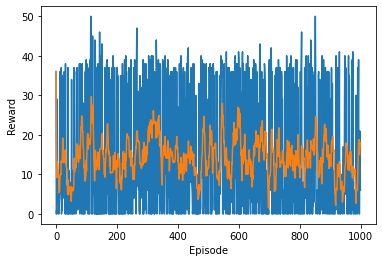

In [12]:
rewards = []
avg_rewards = []

for episode in tqdm(range(NUM_EPISODES)):
    time_step = env.reset()
    state = parse(time_step.observation)
    noise.reset()
    episode_reward = 0

    for step in range(DURATION):
        action = agent.get_action(state)
        action = noise.get_action(action, step)
        time_step_2 = env.step(denorm(action))
        state_2 = parse(time_step_2.observation)
        agent.memory.push(state, action, time_step_2.reward, state_2, -1)
        state = state_2
        if len(agent.memory) > BATCH_SIZE:
            agent.update(BATCH_SIZE)
        episode_reward += time_step_2.reward
    print(f"episode: {episode}, "
      f"reward: {np.round(episode_reward, decimals=2)}, "
      f"average_reward: {np.mean(rewards[-10:])}")
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

agent.save(PATH_MODEL)

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()

In [13]:
# Define a uniform random policy.
t = -1
def policy(time_step):
    global t
    t += 1
    state = parse(time_step.observation)
    action = agent.get_action(state)
    # print(time_step)
    action = noise.get_action(action, t)
    action = denorm(action)
    # print(action)
    return action

# Launch the viewer application.
viewer.launch(env, policy=policy)